<a href="https://colab.research.google.com/github/Ry02024/SignateCup2024Summer_Ry032/blob/master/notebooks/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# „É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´

In [ ]:
# ÂøÖË¶Å„Å™„Éë„ÉÉ„Ç±„Éº„Ç∏„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´
!pip install japanize-matplotlib -q
!pip install catboost -q
!pip install category_encoders -q

# GitHub„É™„Éù„Ç∏„Éà„É™„ÅÆ„ÇØ„É≠„Éº„É≥
!git clone https://github.com/Ry02024/SignateCup2024Summer_Ry032.git

# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import japanize_matplotlib
import pandas as pd
import numpy as np
import re
import unicodedata
import datetime as dt
import matplotlib.pyplot as plt

# „É¢„Éá„É´Èñ¢ÈÄ£„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.cluster import KMeans

# „Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞„ÅÆ„Åü„ÇÅ„ÅÆ„É©„Ç§„Éñ„É©„É™
from category_encoders import CatBoostEncoder

# „ÇØ„É≠„Éº„É≥„Åó„Åü„É™„Éù„Ç∏„Éà„É™ÂÜÖ„ÅÆ„Çπ„ÇØ„É™„Éó„Éà„Çí„Ç§„É≥„Éù„Éº„Éà
from SignateCup2024Summer_Ry032.src import preprocessing
from SignateCup2024Summer_Ry032.src import visualization
from SignateCup2024Summer_Ry032.src import model_optimization

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.1/4.1 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.2/98.2 MB 4.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81.9/81.9 kB 717.4 kB/s eta 0:00:00
Cloning into 'SignateCup2024Summer_Ry032'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 75 (delta 27), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 321.75 KiB | 2.40 MiB/s, done.
Resolving deltas: 100% (27/27), done.


## „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø

In [ ]:
%cd SignateCup2024Summer_Ry032/

/content/SignateCup2024Summer_Ry032


In [ ]:
data_dir = "data/raw/"
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")

In [ ]:
train_x = train.drop(['id', 'ProdTaken'], axis=1)
train_y = train['ProdTaken']
test_x = test.drop(['id'], axis=1)

# „Éá„Éº„ÇøÂàÜÊûê„ÅÆPDCAÔºöÊñΩÁ≠ñ„ÅÆÁîüÊàê

‰ª•‰∏ã„Å´„ÄÅÂêÑ„Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜÂæå„ÅÆÂ§âÊï∞„Åå„Å©„ÅÆÂ∞∫Â∫¶„Å´Â±û„Åô„Çã„Åã„ÇíË™¨Êòé„Åó„ÄÅ„Åù„ÅÆÂ∞∫Â∫¶„Å´Âü∫„Å•„ÅÑ„ÅüÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï„ÇíÊèêÊ°à„Åó„Åæ„Åô„ÄÇ

1. **AgeÔºàÂπ¥ÈΩ¢Ôºâ**
   - **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
   - **Ë™¨Êòé**: Âπ¥ÈΩ¢„ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§ÈÄ£Á∂ö„Åó„ÅüÊï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÇÇÁ≠â„Åó„ÅÑ„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Åß„Åô„ÄÇ
   - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
     - **„Éí„Çπ„Éà„Ç∞„É©„É†**: Âπ¥ÈΩ¢„ÅÆÂàÜÂ∏É„ÇíË¶ã„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ
     - **ÁÆ±„Å≤„ÅíÂõ≥**: Âπ¥ÈΩ¢„ÅÆ‰∏≠Â§ÆÂÄ§„ÇÑÂõõÂàÜ‰ΩçÁØÑÂõ≤„ÄÅÂ§ñ„ÇåÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇ

2. **TypeofContactÔºàÈÄ£Áµ°ÊñπÊ≥ïÔºâ**
   - **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
   - **Ë™¨Êòé**: ÈÄ£Áµ°ÊñπÊ≥ï„ÅØ„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈ†ÜÂ∫è„Åå„Å™„ÅÑ„Åü„ÇÅÂêçÁæ©Â∞∫Â∫¶„Åß„Åô„ÄÇ
   - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
     - **Ê£í„Ç∞„É©„Éï**: ÂêÑ„Ç´„ÉÜ„Ç¥„É™„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
     - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑ„Ç´„ÉÜ„Ç¥„É™„ÅåÂÖ®‰Ωì„ÅÆ„Å©„Çå„Å†„Åë„ÅÆÂâ≤Âêà„ÇíÂç†„ÇÅ„Çã„Åã„ÇíÁ§∫„Åô„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

3. **CityTierÔºàÈÉΩÂ∏ÇÂ±§Ôºâ**
   - **Â∞∫Â∫¶**: È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
   - **Ë™¨Êòé**: ÈÉΩÂ∏ÇÂ±§„ÅØËá™ÁÑ∂„Å™È†ÜÂ∫è„ÇíÊåÅ„Å§„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÅåÁ≠â„Åó„ÅÑ„Å®„ÅØÈôê„Çä„Åæ„Åõ„Çì„Åå„ÄÅÈ†ÜÂ∫è„Åå„ÅÇ„Çã„Åü„ÇÅÈ†ÜÂ∫èÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ
   - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
     - **Ê£í„Ç∞„É©„Éï**: ÂêÑÈÉΩÂ∏ÇÂ±§„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
     - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÈÉΩÂ∏ÇÂ±§„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

4. **DurationOfPitchÔºà„Éó„É¨„Çº„É≥ÊôÇÈñìÔºâ**
   - **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
   - **Ë™¨Êòé**: „Éó„É¨„Çº„É≥ÊôÇÈñì„ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§ÈÄ£Á∂ö„Åó„ÅüÊï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÇÇÁ≠â„Åó„ÅÑ„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Åß„Åô„ÄÇ
   - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
     - **„Éí„Çπ„Éà„Ç∞„É©„É†**: „Éó„É¨„Çº„É≥ÊôÇÈñì„ÅÆÂàÜÂ∏É„ÇíË¶ã„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ
     - **ÁÆ±„Å≤„ÅíÂõ≥**: „Éó„É¨„Çº„É≥ÊôÇÈñì„ÅÆ‰∏≠Â§ÆÂÄ§„ÇÑÂõõÂàÜ‰ΩçÁØÑÂõ≤„ÄÅÂ§ñ„ÇåÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇ

5. **OccupationÔºà„ÅîËÅ∑Ê•≠Ôºâ**
   - **Â∞∫Â∫¶**: È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
   - **Ë™¨Êòé**: ËÅ∑Ê•≠„ÅØËá™ÁÑ∂„Å™È†ÜÂ∫è„ÇíÊåÅ„Å§„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÅåÁ≠â„Åó„ÅÑ„Å®„ÅØÈôê„Çä„Åæ„Åõ„Çì„Åå„ÄÅÈ†ÜÂ∫è„Åå„ÅÇ„Çã„Åü„ÇÅÈ†ÜÂ∫èÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ
   - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
     - **Ê£í„Ç∞„É©„Éï**: ÂêÑËÅ∑Ê•≠„Ç´„ÉÜ„Ç¥„É™„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
     - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑËÅ∑Ê•≠„Ç´„ÉÜ„Ç¥„É™„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

6. **GenderÔºàÊÄßÂà•Ôºâ**
   - **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
   - **Ë™¨Êòé**: ÊÄßÂà•„ÅØÈ†ÜÂ∫è„Åå„Å™„ÅÑ„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„ÅÇ„Çã„Åü„ÇÅÂêçÁæ©Â∞∫Â∫¶„Åß„Åô„ÄÇ
   - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
     - **Ê£í„Ç∞„É©„Éï**: ÊÄßÂà•„Åî„Å®„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
     - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÊÄßÂà•„ÅåÂÖ®‰Ωì„ÅÆ„Å©„Çå„Å†„Åë„ÅÆÂâ≤Âêà„ÇíÂç†„ÇÅ„Çã„Åã„ÇíÁ§∫„Åô„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

7. **NumberOfPersonVisitingÔºàÂêåË°åËÄÖ„ÅÆÊï∞Ôºâ**
   - **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
   - **Ë™¨Êòé**: ÂêåË°åËÄÖ„ÅÆÊï∞„ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§Èõ¢Êï£ÁöÑ„Å™Êï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÇÇÁ≠â„Åó„ÅÑ„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Åß„Åô„ÄÇ
   - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
     - **Ê£í„Ç∞„É©„Éï**: ÂêÑÂêåË°åËÄÖÊï∞„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÁâπ„Å´„ÄÅÂ∞ëÊï∞„ÅÆÈõ¢Êï£ÂÄ§„ÅÆÂ†¥Âêà„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
     - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÂêåË°åËÄÖÊï∞„ÅåÂÖ®‰Ωì„ÅÆ„Å©„Çå„Å†„Åë„ÅÆÂâ≤Âêà„ÇíÂç†„ÇÅ„Çã„Åã„ÇíÁ§∫„Åô„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

8. **NumberOfFollowupsÔºà„Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„ÉóÂõûÊï∞Ôºâ**
   - **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
   - **Ë™¨Êòé**: „Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„ÉóÂõûÊï∞„ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§ÈÄ£Á∂ö„Åó„ÅüÊï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÇÇÁ≠â„Åó„ÅÑ„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Åß„Åô„ÄÇ
   - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
     - **„Éí„Çπ„Éà„Ç∞„É©„É†**: „Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„ÉóÂõûÊï∞„ÅÆÂàÜÂ∏É„ÇíË¶ã„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ
     - **ÁÆ±„Å≤„ÅíÂõ≥**: „Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„ÉóÂõûÊï∞„ÅÆ‰∏≠Â§ÆÂÄ§„ÇÑÂõõÂàÜ‰ΩçÁØÑÂõ≤„ÄÅÂ§ñ„ÇåÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇ

9. **ProductPitchedÔºàÂ£≤„ÇäËæº„ÅøÂïÜÂìÅ„ÅÆÁ®ÆÈ°ûÔºâ**
   - **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
   - **Ë™¨Êòé**: Â£≤„ÇäËæº„ÅøÂïÜÂìÅ„ÅÆÁ®ÆÈ°û„ÅØÈ†ÜÂ∫è„Åå„Å™„ÅÑ„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„ÅÇ„Çã„Åü„ÇÅÂêçÁæ©Â∞∫Â∫¶„Åß„Åô„ÄÇ
   - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
     - **Ê£í„Ç∞„É©„Éï**: ÂêÑÂïÜÂìÅ„ÅÆÁ®ÆÈ°û„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
     - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÂïÜÂìÅ„ÅÆÁ®ÆÈ°û„ÅåÂÖ®‰Ωì„ÅÆ„Å©„Çå„Å†„Åë„ÅÆÂâ≤Âêà„ÇíÂç†„ÇÅ„Çã„Åã„ÇíÁ§∫„Åô„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

10. **PreferredPropertyStarÔºà„Éõ„ÉÜ„É´ÊñΩË®≠„ÅÆÂÑ™ÂÖàË©ï‰æ°Ôºâ**
    - **Â∞∫Â∫¶**: È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
    - **Ë™¨Êòé**: „Éõ„ÉÜ„É´ÊñΩË®≠„ÅÆÂÑ™ÂÖàË©ï‰æ°„ÅØËá™ÁÑ∂„Å™È†ÜÂ∫è„ÇíÊåÅ„Å§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÅåÁ≠â„Åó„ÅÑ„Å®„ÅØÈôê„Çä„Åæ„Åõ„Çì„Åå„ÄÅÈ†ÜÂ∫è„Åå„ÅÇ„Çã„Åü„ÇÅÈ†ÜÂ∫èÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ
    - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
      - **Ê£í„Ç∞„É©„Éï**: ÂêÑË©ï‰æ°„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
      - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑË©ï‰æ°„ÅåÂÖ®‰Ωì„ÅÆ„Å©„Çå„Å†„Åë„ÅÆÂâ≤Âêà„ÇíÂç†„ÇÅ„Çã„Åã„ÇíÁ§∫„Åô„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

11. **NumberOfTripsÔºàÂπ¥ÈñìÊóÖË°åÊï∞Ôºâ**
    - **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
    - **Ë™¨Êòé**: ÊóÖË°åÂõûÊï∞„ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§ÈÄ£Á∂ö„Åó„ÅüÊï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÇÇÁ≠â„Åó„ÅÑ„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Åß„Åô„ÄÇ
    - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
      - **„Éí„Çπ„Éà„Ç∞„É©„É†**: ÊóÖË°åÂõûÊï∞„ÅÆÂàÜÂ∏É„ÇíË¶ã„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ
      - **Ê£í„Ç∞„É©„Éï**: ÊóÖË°åÂõûÊï∞„Åî„Å®„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

12. **PassportÔºà„Éë„Çπ„Éù„Éº„Éà„ÅÆÊâÄÊåÅÔºâ**
    - **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
    - **Ë™¨Êòé**: „Éë„Çπ„Éù„Éº„Éà„ÅÆÊâÄÊåÅ„ÅØÈ†ÜÂ∫è„Åå„Å™„ÅÑ„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„ÅÇ„Çã„Åü„ÇÅÂêçÁæ©Â∞∫Â∫¶„Åß„Åô„ÄÇ
    - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
      - **Ê£í„Ç∞„É©„Éï**: „Éë„Çπ„Éù„Éº„ÉàÊâÄÊåÅËÄÖ„Å®ÈùûÊâÄÊåÅËÄÖ„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
      - **ÂÜÜ„Ç∞„É©„Éï**: „Éë„Çπ„Éù„Éº„Éà„ÅÆÊâÄÊåÅÁä∂ÊÖã„ÅåÂÖ®‰Ωì„ÅÆ„Å©„Çå„Å†„Åë„ÅÆÂâ≤Âêà„ÇíÂç†„ÇÅ„Çã„Åã„ÇíÁ§∫„Åô„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

13. **PitchSatisfactionScoreÔºàÊ∫ÄË∂≥Â∫¶„Çπ„Ç≥„Ç¢Ôºâ**
    - **Â∞∫Â∫¶**: È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
    - **Ë™¨Êòé**: Ê∫ÄË∂≥Â∫¶„Çπ„Ç≥„Ç¢„ÅØËá™ÁÑ∂„Å™È†ÜÂ∫è„ÇíÊåÅ„Å§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÅåÁ≠â„Åó„ÅÑ„Å®„ÅØÈôê„Çä„Åæ„Åõ„Çì„Åå„ÄÅÈ†ÜÂ∫è„Åå„ÅÇ„Çã„Åü„ÇÅÈ†ÜÂ∫èÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ
    - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
      - **Ê£í„Ç∞„É©„Éï**: ÂêÑ„Çπ„Ç≥„Ç¢„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
      - **ÁÆ±„Å≤„ÅíÂõ≥**: ÂêÑ„Çπ„Ç≥„Ç¢„ÅÆ‰∏≠Â§ÆÂÄ§„ÇÑÂõõÂàÜ‰ΩçÁØÑÂõ≤„ÄÅÂ§ñ„ÇåÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇ

14. **DesignationÔºàÂΩπËÅ∑Ôºâ**
    - **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
    - **Ë™¨Êòé**: ÂΩπËÅ∑„ÅØÈ†ÜÂ∫è„Åå„Å™„ÅÑ„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„ÅÇ„Çã„Åü„ÇÅÂêçÁæ©Â∞∫Â∫¶„Åß„Åô„ÄÇ
    - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
      - **Ê£í„Ç∞„É©„Éï**: ÂΩπËÅ∑„Åî„Å®„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
      - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÂΩπËÅ∑„ÅåÂÖ®‰Ωì„ÅÆ„Å©„Çå„Å†„Åë„ÅÆÂâ≤Âêà„ÇíÂç†„ÇÅ„Çã„Åã„ÇíÁ§∫„Åô„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

15. **MonthlyIncomeÔºàÊúàÂèéÔºâ**
    - **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
    - **Ë™¨Êòé**: ÊúàÂèé„ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§ÈÄ£Á∂ö„Åó„ÅüÊï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÇÇÁ≠â„Åó„ÅÑ„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Åß„Åô„ÄÇ
    - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
      - **„Éí„Çπ„Éà„Ç∞„É©„É†**: ÊúàÂèé„ÅÆÂàÜÂ∏É„ÇíË¶ã„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ
      - **ÁÆ±„Å≤„ÅíÂõ≥**: ÊúàÂèé„ÅÆ‰∏≠Â§ÆÂÄ§„ÇÑÂõõÂàÜ‰ΩçÁØÑÂõ≤„ÄÅÂ§ñ„ÇåÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇ

16. **customer_infoÔºàÈ°ßÂÆ¢ÊÉÖÂ†±Ôºâ**
    - **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale) „Åæ„Åü„ÅØ È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
    - **Ë™¨Êòé**: È°ßÂÆ¢ÊÉÖÂ†±„Å´„ÅØ„ÄÅÂêçÁæ©Â∞∫Â∫¶„Å®È†ÜÂ∫èÂ∞∫Â∫¶„ÅÆ„Éá„Éº„Çø„ÅåÊ∑∑Âú®„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
      - **married**: ÂêçÁæ©Â∞∫Â∫¶ÔºàÊó¢Â©ö„ÄÅÊú™Â©ö„Å™„Å©Ôºâ
      - **car_possesion**: ÂêçÁæ©Â∞∫Â∫¶ÔºàËªä„ÅÆÊâÄÊúâ„ÅÆÊúâÁÑ°Ôºâ
      - **offspring**: ÊØîÁéáÂ∞∫Â∫¶ÔºàÂ≠ê‰æõ„ÅÆÊï∞Ôºâ
      - **offspring_identified**: ÂêçÁæ©Â∞∫Â∫¶ÔºàÂ≠ê‰æõ„ÅÆÊúâÁÑ°„Åå‰∏çÊòé„Åã„Å©„ÅÜ„Åã„ÅÆ„Éï„É©„Ç∞Ôºâ
    - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
      - **married„ÇÑcar_possesion**: Ê£í„Ç∞„É©„Éï„ÇÑÂÜÜ„Ç∞„É©„Éï„ÅßÂêÑ„Ç´„ÉÜ„Ç¥„É™„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„ÄÇ
      - **offspring**: „Éí„Çπ„Éà„Ç∞„É©„É†„ÇÑÊ£í„Ç∞„É©„Éï„ÅßÂ≠ê‰æõ„ÅÆÊï∞„ÅÆÂàÜÂ∏É„ÇÑÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„ÄÇ
      - **offspring_identified**: Ê£í„Ç∞„É©„Éï„Åß„Éï„É©„Ç∞„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„ÄÇ

17. **ProdTakenÔºàÁõÆÁöÑÂ§âÊï∞Ôºâ**
    - **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
    - **Ë™¨Êòé**: `ProdTaken` „ÅØÊàêÁ¥ÑÁä∂ÊÖãÔºà0:‰∏çÊàêÁ¥Ñ„ÄÅ1:ÊàêÁ¥ÑÔºâ„ÇíÁ§∫„Åô„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈ†ÜÂ∫è„Åå„Å™„ÅÑ„Åü„ÇÅÂêçÁæ©Â∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ
    - **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
      - **Ê£í„Ç∞„É©„Éï**: ÊàêÁ¥Ñ„Å®‰∏çÊàêÁ¥Ñ„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ
      - **ÂÜÜ„Ç∞„É©„Éï**: ÊàêÁ¥Ñ„Å®‰∏çÊàêÁ¥Ñ„ÅÆÂâ≤Âêà„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

„Åì„ÅÆÊÉÖÂ†±„Å´Âü∫„Å•„ÅÑ„Å¶„ÄÅÂêÑÂ§âÊï∞„Å´ÂØæ„Åó„Å¶ÈÅ©Âàá„Å™ÂâçÂá¶ÁêÜ„Å®ÂèØË¶ñÂåñÊñπÊ≥ï„ÇíÈÅ∏Êäû„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ„Åì„Çå„Å´„Çà„Çä„ÄÅ„Éá„Éº„Çø„ÅÆÁêÜËß£„ÅåÊ∑±„Åæ„Çä„ÄÅÂàÜÊûê„ÅÆÁ≤æÂ∫¶„ÅåÂêë‰∏ä„Åô„Çã„Åß„Åó„Çá„ÅÜ„ÄÇ

## „É©„Ç§„Éñ„É©„É™„ÅÆË™≠„ÅøËæº„Åø

## „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø

In [ ]:
data_dir = "data/processed/"
train_processed = pd.read_csv(data_dir + "train_processed.csv")
test_processed = pd.read_csv(data_dir + "test_processed.csv")

In [ ]:
train_processed_x = train_processed.drop(['ProdTaken'], axis=1)
train_processed_y = train_processed['ProdTaken']

## ÂèØË¶ñÂåñ„ÅÆ„Åü„ÇÅ„ÅÆÂâçÂá¶ÁêÜÔºà‰∏ÄÂ§âÈáè„Éá„Éº„Çø„ÅÆÂàÜÊûêÔºâ

„Åì„Åì„Åß‰ΩøÁî®„Åô„ÇãÈñ¢Êï∞„ÇíÁ§∫„Åó„Åæ„Åô

### 1.AgeÔºàÂπ¥ÈΩ¢Ôºâ

- **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
  - **Ë™¨Êòé**: Âπ¥ÈΩ¢„ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§ÈÄ£Á∂ö„Åó„ÅüÊï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÇÇÁ≠â„Åó„ÅÑ„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Åß„Åô„ÄÇ
- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **„Éí„Çπ„Éà„Ç∞„É©„É†**: Âπ¥ÈΩ¢„ÅÆÂàÜÂ∏É„ÇíË¶ã„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ
  - **ÁÆ±„Å≤„ÅíÂõ≥**: Âπ¥ÈΩ¢„ÅÆ‰∏≠Â§ÆÂÄ§„ÇÑÂõõÂàÜ‰ΩçÁØÑÂõ≤„ÄÅÂ§ñ„ÇåÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇ

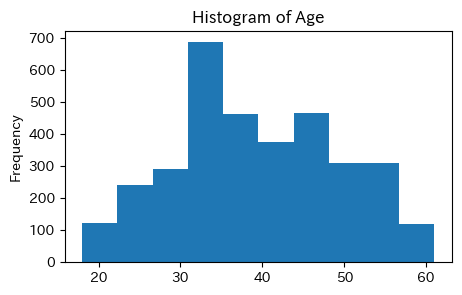

In [ ]:
visualization.HistChart(train_processed_x['Age'])

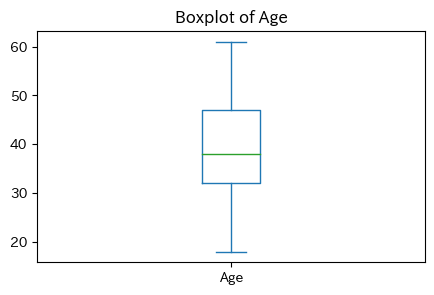

In [ ]:
visualization.BoxChart(train_processed_x['Age'])

In [ ]:
train_age.isnull().sum()

100

### 2.TypeofContactÔºàÈÄ£Áµ°ÊñπÊ≥ïÔºâ

- **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
  - **Ë™¨Êòé**: `TypeofContact` „ÅØ„ÄÅÈ°ßÂÆ¢„Åå‰ºÅÊ•≠„Å®„Å©„ÅÆ„Çà„ÅÜ„Å´Êé•Ëß¶„Åó„Åü„Åã„ÇíÁ§∫„Åô„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„Åß„Åô„ÄÇ„Ç´„ÉÜ„Ç¥„É™Èñì„Å´È†ÜÂ∫è„ÅØ„Å™„Åè„ÄÅÂçò„Å´ÂêÑ„Ç´„ÉÜ„Ç¥„É™„ÅÆÈÅï„ÅÑ„ÇíË≠òÂà•„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åï„Çå„Åæ„Åô„ÄÇ
  
- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï (Bar Chart)**: ÂêÑÊé•Ëß¶ÊñπÊ≥ï„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÁöÑ„Å´ÊØîËºÉ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ„Éê„Éº„ÅÆÈ´ò„Åï„Åß„ÄÅÂêÑÊé•Ëß¶ÊñπÊ≥ï„ÅÆÂá∫ÁèæÂõûÊï∞„ÇíÁ§∫„Åó„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï (Pie Chart)**: ÂêÑÊé•Ëß¶ÊñπÊ≥ï„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÂåñ„Åô„Çã„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÁâπ„Å´„ÄÅ„Ç´„ÉÜ„Ç¥„É™Êï∞„ÅåÂ∞ë„Å™„ÅÑÂ†¥Âêà„Å´ÊúâÂäπ„Åß„Åô„ÄÇ

In [ ]:
train_x['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       2194
Company Invited    1289
Name: count, dtype: int64

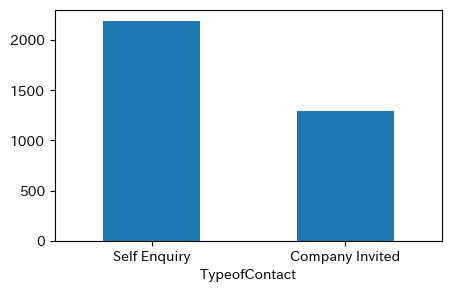

In [ ]:
BarChart(train_x['TypeofContact'])

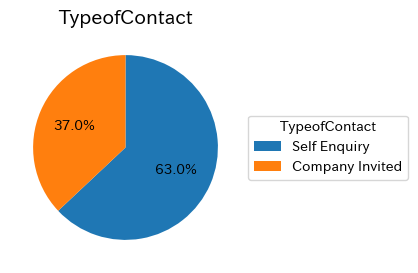

In [ ]:
PieChart(train_x['TypeofContact'])

### 3.CityTierÔºàÈÉΩÂ∏ÇÂ±§Ôºâ

- **Â∞∫Â∫¶**: È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
  - **Ë™¨Êòé**: `CityTier` „ÅØ„ÄÅÈÉΩÂ∏Ç„ÅÆÈöéÂ±§„ÇÑ„É¨„Éô„É´„ÇíÁ§∫„Åô„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„Åß„Åô„ÄÇ„Åì„ÅÆ„Éá„Éº„Çø„Å´„ÅØËá™ÁÑ∂„Å™È†ÜÂ∫è„Åå„ÅÇ„Çä„ÄÅ‰æã„Åà„Å∞„ÄÅTier 1 „ÅåÊúÄ„ÇÇÈ´ò„ÅÑ„É¨„Éô„É´„ÄÅTier 2 „Åå„Åù„ÅÆÊ¨°„ÄÅTier 3 „ÅåÊúÄ„ÇÇ‰Ωé„ÅÑ„É¨„Éô„É´„Å®„ÅÑ„Å£„Åü„Çà„ÅÜ„Å´„ÄÅÈÉΩÂ∏Ç„ÅÆÈöéÂ±§„ÇíË°®„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Åü„Å†„Åó„ÄÅÈöéÂ±§Èñì„ÅÆÂ∑Æ„ÅåÂùáÁ≠â„Åß„ÅÇ„Çã„Å®„ÅØÈôê„Çä„Åæ„Åõ„Çì„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï (Bar Chart)**: ÂêÑÈÉΩÂ∏ÇÈöéÂ±§„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÁöÑ„Å´ÊØîËºÉ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÊ£í„ÅÆÈ´ò„Åï„Åß„ÄÅÂêÑÈÉΩÂ∏ÇÈöéÂ±§„ÅÆÂá∫ÁèæÂõûÊï∞„ÇíÁ§∫„Åó„Åæ„Åô„ÄÇ
  - **ÁÆ±„Å≤„ÅíÂõ≥ (Box Plot)**: „ÇÇ„Åó `CityTier` „ÅåÊï∞ÂÄ§„Éá„Éº„Çø„Å´Â§âÊèõÂèØËÉΩ„Åß„ÅÇ„Çå„Å∞„ÄÅÈöéÂ±§„Åî„Å®„ÅÆ„Éá„Éº„ÇøÂàÜÂ∏É„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„Åå„ÄÅÈÄöÂ∏∏„ÅØÊ£í„Ç∞„É©„Éï„Åå„Çà„Çä‰∏ÄËà¨ÁöÑ„Åß„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï (Pie Chart)**: ÂêÑÈÉΩÂ∏ÇÈöéÂ±§„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÂåñ„Åô„Çã„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÁâπ„Å´„ÄÅÈÉΩÂ∏ÇÈöéÂ±§„ÅåÂ∞ëÊï∞„Åß„ÅÇ„ÇãÂ†¥Âêà„Å´ÊúâÂäπ„Åß„Åô„ÄÇ

In [ ]:
# CityTier È†ÜÂ∫èÂ∞∫Â∫¶
train['CityTier'].value_counts()

CityTier
2    1596
1    1475
3     418
Name: count, dtype: int64

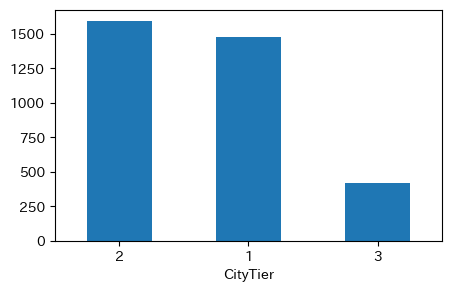

In [ ]:
BarChart(train_x['CityTier'])

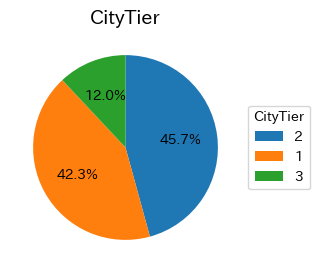

In [ ]:
PieChart(train_x['CityTier'])

### 4.DurationOfPitchÔºà„Éó„É¨„Çº„É≥ÊôÇÈñìÔºâ

- **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
  - **Ë™¨Êòé**: `DurationOfPitch` „ÅØ„Éó„É¨„Çº„É≥„ÉÜ„Éº„Ç∑„Éß„É≥„ÅÆÊôÇÈñì„ÇíÁ§∫„ÅôÈÄ£Á∂ö„Åó„ÅüÊï∞ÂÄ§„Éá„Éº„Çø„Åß„Åô„ÄÇ„Åì„ÅÆ„Éá„Éº„Çø„ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å°„ÄÅÈñìÈöî„ÅåÁ≠â„Åó„ÅÑ„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ„Çº„É≠„ÅØ„Äå„Éó„É¨„Çº„É≥ÊôÇÈñì„Åå„Å™„ÅÑ„Äç„Åì„Å®„ÇíÁ§∫„Åó„ÄÅ‰ªñ„ÅÆÂÄ§„ÅØ„Åù„ÅÆÊôÇÈñì„Åå„Å©„Çå„Å†„ÅëÈï∑„ÅÑ„Åã„ÇíÁ§∫„Åó„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **„Éí„Çπ„Éà„Ç∞„É©„É†**: „Éó„É¨„Çº„É≥„ÉÜ„Éº„Ç∑„Éß„É≥ÊôÇÈñì„ÅÆÂàÜÂ∏É„ÇíË¶ã„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÂÖ®‰ΩìÁöÑ„Å™ÂàÜÂ∏É„ÇÑÂÅè„Çä„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÁÆ±„Å≤„ÅíÂõ≥**: „Éó„É¨„Çº„É≥„ÉÜ„Éº„Ç∑„Éß„É≥ÊôÇÈñì„ÅÆ‰∏≠Â§ÆÂÄ§„ÇÑÂõõÂàÜ‰ΩçÁØÑÂõ≤„ÄÅÂ§ñ„ÇåÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇÁâπ„Å´„ÄÅ„Éá„Éº„Çø„ÅÆ‰∏≠ÂøÉÂÇæÂêë„ÇÑÊï£„Çâ„Å∞„ÇäÂÖ∑Âêà„ÄÅÁï∞Â∏∏ÂÄ§„ÇíÊääÊè°„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ

In [ ]:
train_DurationOfPitch = train_x['DurationOfPitch'].apply(preprocessing.convert_to_minutes)

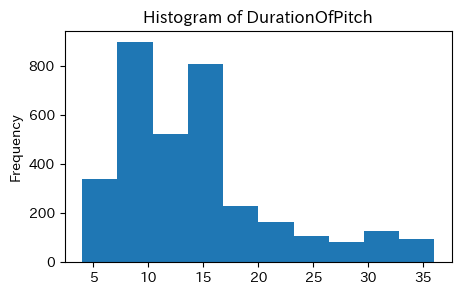

In [ ]:
HistChart(train_DurationOfPitch)

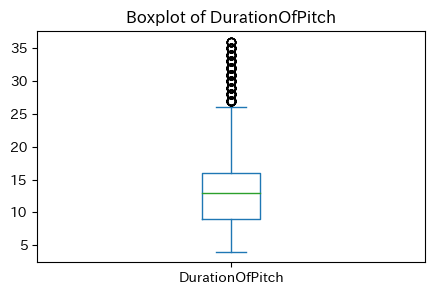

In [ ]:
BoxChart(train_DurationOfPitch)

### 5.OccupationÔºàËÅ∑Ê•≠Ôºâ

- **Â∞∫Â∫¶**: È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
  - **Ë™¨Êòé**: `Occupation` „ÅØËÅ∑Ê•≠„ÇíÁ§∫„Åô„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„Åß„ÄÅËÅ∑Ê•≠Èñì„Å´„ÅØËá™ÁÑ∂„Å™È†ÜÂ∫è„ÅåÂ≠òÂú®„Åó„Åæ„ÅôÔºà‰æã: Large Business, Small Business, SalariedÔºâ„ÄÇ„Åì„Çå„Çâ„ÅÆ„Ç´„ÉÜ„Ç¥„É™„Å´„ÅØÈ†ÜÂ∫è„Åå„ÅÇ„Çä„ÄÅ‰æã„Åà„Å∞Â§ß‰ºÅÊ•≠„ÅåÂ∞è‰ºÅÊ•≠„Çà„Çä„ÇÇ‰∏ä‰Ωç„Å´‰ΩçÁΩÆ„Å•„Åë„Çâ„Çå„Çã„Å™„Å©„ÄÅ‰∏ÄÂÆö„ÅÆÈöéÂ±§Èñ¢‰øÇ„Åå„ÅÇ„Çä„Åæ„Åô„Åå„ÄÅ„Åù„ÅÆÈñìÈöî„ÅØÂøÖ„Åö„Åó„ÇÇÁ≠â„Åó„Åè„ÅÇ„Çä„Åæ„Åõ„Çì„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï (Bar Chart)**: ÂêÑËÅ∑Ê•≠„Ç´„ÉÜ„Ç¥„É™„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÁöÑ„Å´ÊØîËºÉ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÂêÑ„Éê„Éº„ÅÆÈ´ò„Åï„Åß„ÄÅËÅ∑Ê•≠„Åî„Å®„ÅÆÂá∫ÁèæÂõûÊï∞„ÇíÁ§∫„Åó„Åæ„Åô„ÄÇ
  - **ÁÆ±„Å≤„ÅíÂõ≥ (Box Plot)**: „ÇÇ„Åó‰ªñ„ÅÆÊï∞ÂÄ§„Éá„Éº„Çø„Å®ÁµÑ„ÅøÂêà„Çè„Åõ„Å¶ËÅ∑Ê•≠„Ç´„ÉÜ„Ç¥„É™„Åî„Å®„ÅÆ„Éá„Éº„ÇøÂàÜÂ∏É„ÇíË¶ã„Åü„ÅÑÂ†¥Âêà„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇ„Åü„Å†„Åó„ÄÅÈÄöÂ∏∏„ÅØÊ£í„Ç∞„É©„Éï„ÅßËÅ∑Ê•≠„Åî„Å®„ÅÆÈ†ªÂ∫¶„ÇíÊØîËºÉ„Åô„Çã„ÅÆ„Åå‰∏ÄËà¨ÁöÑ„Åß„Åô„ÄÇ

In [ ]:
# Occupation È†ÜÂ∫èÂ∞∫Â∫¶
train['Occupation'].value_counts()

Occupation
Small Business    1727
Salaried          1401
Large Business     361
Name: count, dtype: int64

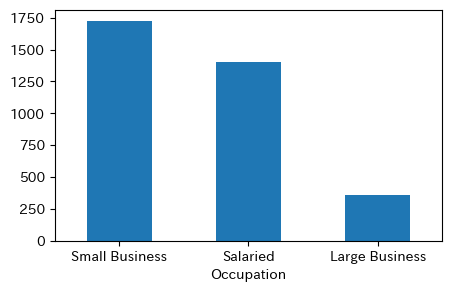

In [ ]:
BarChart(train['Occupation'])

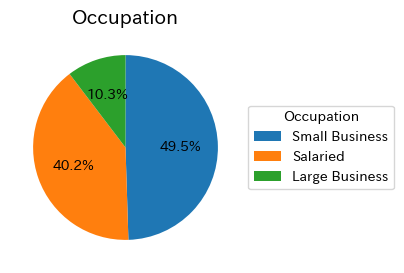

In [ ]:
PieChart(train['Occupation'])

### 6.GenderÔºàÊÄßÂà•Ôºâ

- **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
  - **Ë™¨Êòé**: `Gender` „ÅØÊÄßÂà•„ÇíÁ§∫„Åô„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„Åß„ÄÅÊÄßÂà•Èñì„Å´„ÅØÈ†ÜÂ∫è„ÇÑÊï∞ÂÄ§ÁöÑ„Å™Èñ¢‰øÇ„Åå„ÅÇ„Çä„Åæ„Åõ„Çì„ÄÇ„Åì„Çå„ÅØ„ÄÅ„Éá„Éº„Çø„ÅåÂçò„Å´„É©„Éô„É´Ôºà‰æã: Male, FemaleÔºâ„Å®„Åó„Å¶‰ΩøÁî®„Åï„Çå„ÄÅ„Åù„Çå„Çâ„ÅÆÈñì„Å´ÂÑ™Âä£„ÇÑÈ†ÜÂ∫è„ÅåÂ≠òÂú®„Åó„Å™„ÅÑ„Åü„ÇÅ„ÄÅÂêçÁæ©Â∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï (Bar Chart)**: ÂêÑÊÄßÂà•„Ç´„ÉÜ„Ç¥„É™„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÁöÑ„Å´ÊØîËºÉ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÂêÑ„Éê„Éº„ÅÆÈ´ò„Åï„Åß„ÄÅÊÄßÂà•„Åî„Å®„ÅÆÂá∫ÁèæÂõûÊï∞„ÇíÁ§∫„Åó„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï (Pie Chart)**: ÂêÑÊÄßÂà•„Ç´„ÉÜ„Ç¥„É™„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÁâπ„Å´„ÄÅÊÄßÂà•„ÅÆÂâ≤Âêà„ÇíÊØîËºÉ„Åô„ÇãÂ†¥Âêà„Å´ÊúâÂäπ„Åß„Åô„ÄÇ

In [ ]:
# Gender categorical
def Gender_dealing(gender):
    # ÊñáÂ≠óÂàó„ÇíÂçäËßí„Å´Â§âÊèõ„Åó„ÄÅÂ§ßÊñáÂ≠ó„Å´Áµ±‰∏Ä
    gender = unicodedata.normalize('NFKC', gender).upper().strip()
    # ‰∏çË¶Å„Å™Á©∫ÁôΩ„ÇíÂâäÈô§
    gender = ''.join(gender.split())
    return gender

In [ ]:
train_Gender = train_x['Gender'].apply(Gender_dealing)

In [ ]:
train_Gender.value_counts()

Gender
MALE      2064
FEMALE    1425
Name: count, dtype: int64

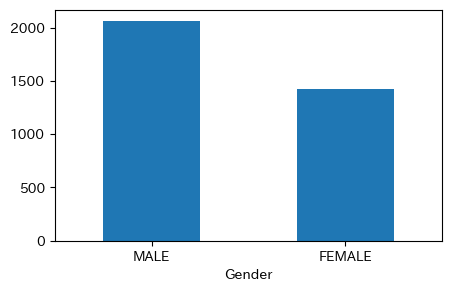

In [ ]:
BarChart(train_Gender)

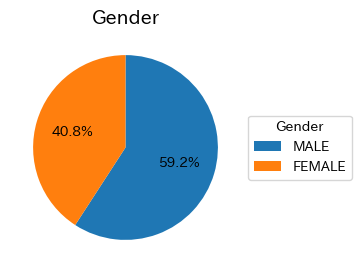

In [ ]:
PieChart(train_Gender)

### 7.NumberOfPersonVisitingÔºàÂêåË°åËÄÖÊï∞Ôºâ

- **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
  - **Ë™¨Êòé**: `NumberOfPersonVisiting` „ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§Èõ¢Êï£ÁöÑ„Å™Êï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈñìÈöî„ÇÇÁ≠â„Åó„ÅÑ„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Åß„Åô„ÄÇÂêåË°åËÄÖ„ÅÆ‰∫∫Êï∞„ÅåÂ¢ó„Åà„Çã„Å´„Å§„Çå„Å¶„Åù„ÅÆÂÄ§„ÇÇÂ¢óÂä†„Åó„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: ÂêÑ‰∫∫Êï∞„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÁöÑ„Å´ÊØîËºÉ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÁâπ„Å´„ÄÅÂ∞ëÊï∞„ÅÆÈõ¢Êï£ÂÄ§„ÅÆÂ†¥Âêà„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑ‰∫∫Êï∞„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíÁ§∫„Åô„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

In [ ]:
# NumberOfPersonVisiting numeric
train_x['NumberOfPersonVisiting'].value_counts()

NumberOfPersonVisiting
2.0    1608
3.0    1377
1.0     336
4.0     168
Name: count, dtype: int64

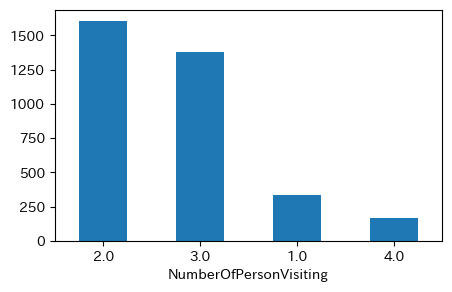

In [ ]:
BarChart(train_x['NumberOfPersonVisiting'])

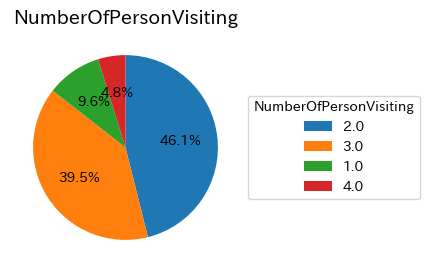

In [ ]:
PieChart(train_x['NumberOfPersonVisiting'])

### 8.NumberOfFollowupsÔºà„Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„Éó„ÅÆÂõûÊï∞Ôºâ

- **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
  - **Ë™¨Êòé**: `NumberOfFollowups` „ÅØ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§ÈÄ£Á∂ö„Åó„ÅüÊï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅ„Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„Éó„ÅÆÂõûÊï∞„ÇíË°®„Åó„Åæ„Åô„ÄÇ„Çº„É≠„ÅØ„Äå„Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„Éó„Åå‰∏ÄÂ∫¶„ÇÇË°å„Çè„Çå„Å™„Åã„Å£„Åü„Äç„Åì„Å®„ÇíÊÑèÂë≥„Åó„ÄÅÂõûÊï∞„ÅåÂ¢ó„Åà„Çã„Åî„Å®„Å´„Åù„ÅÆÂÄ§„ÇÇÂ¢óÂä†„Åó„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **„Éí„Çπ„Éà„Ç∞„É©„É†**: „Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„ÉóÂõûÊï∞„ÅÆÂàÜÂ∏É„ÇíË¶ã„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÂÖ®‰ΩìÁöÑ„Å™ÂàÜÂ∏É„ÇÑÂõûÊï∞„ÅÆÂÅè„Çä„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÁÆ±„Å≤„ÅíÂõ≥**: „Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„ÉóÂõûÊï∞„ÅÆ‰∏≠Â§ÆÂÄ§„ÇÑÂõõÂàÜ‰ΩçÁØÑÂõ≤„ÄÅÂ§ñ„ÇåÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇÁâπ„Å´„ÄÅ„Éá„Éº„Çø„ÅÆ‰∏≠ÂøÉÂÇæÂêë„ÇÑÊï£„Çâ„Å∞„ÇäÂÖ∑Âêà„ÄÅÁï∞Â∏∏ÂÄ§„ÇíÊääÊè°„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ

In [ ]:
# NumberOfFollowups numeric
def NumberOfFollowups_dealing(input_int):
    if input_int >= 100: #Â∏∏Ë≠òÁöÑ„Å´x00Âõû„ÅØË®òËø∞„Éü„Çπ„Å®Âà§Êñ≠
        return input_int /100
    else:
        return input_int

In [ ]:
train_NumberOfFollowups = train_x['NumberOfFollowups'].apply(NumberOfFollowups_dealing)

In [ ]:
train_NumberOfFollowups.value_counts()

NumberOfFollowups
4.0    1411
3.0    1296
5.0     524
2.0     108
1.0      78
6.0      39
Name: count, dtype: int64

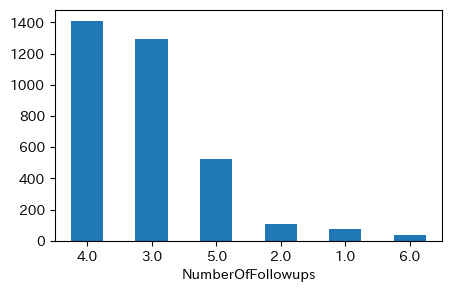

In [ ]:
BarChart(train_NumberOfFollowups)

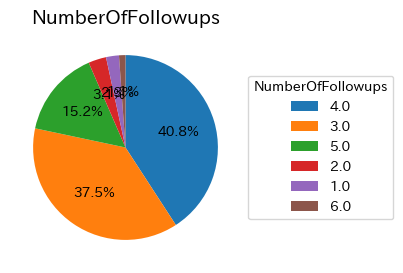

In [ ]:
PieChart(train_NumberOfFollowups)

### 9.ProductPitchedÔºàÂ£≤„ÇäËæº„ÅøÂïÜÂìÅ„ÅÆÁ®ÆÈ°ûÔºâ

- **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
  - **Ë™¨Êòé**: `ProductPitched` „ÅØ„ÄÅÂñ∂Ê•≠ÊãÖÂΩìËÄÖ„ÅåÂ£≤„ÇäËæº„Çì„Å†ÂïÜÂìÅ„ÅÆÁ®ÆÈ°û„ÇíÁ§∫„Åô„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅÈ†ÜÂ∫è„Åå„Å™„ÅÑ„Åü„ÇÅÂêçÁæ©Â∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇÂêÑÂïÜÂìÅ„Ç´„ÉÜ„Ç¥„É™„ÉºÈñì„Å´„ÅØÈ†ÜÂ∫è„ÇÑÊï∞ÂÄ§ÁöÑ„Å™Èñ¢‰øÇ„Åå„ÅÇ„Çä„Åæ„Åõ„Çì„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: ÂêÑÂïÜÂìÅ„ÅÆÁ®ÆÈ°û„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÂêÑÂïÜÂìÅ„Åå„Å©„Çå„Å†„ÅëÈ†ªÁπÅ„Å´Â£≤„ÇäËæº„Åæ„Çå„Åü„Åã„ÇíÊØîËºÉ„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÂïÜÂìÅ„ÅÆÁ®ÆÈ°û„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíÁ§∫„Åô„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÂêÑÂïÜÂìÅ„Ç´„ÉÜ„Ç¥„É™„Éº„ÅÆÊØîÁéá„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åß„Åç„Åæ„Åô„ÄÇ

In [ ]:
def standardize_str(input_str):
    # ÊñáÂ≠óÂàó„ÇíÂçäËßí„Å´Â§âÊèõ„Åó„ÄÅÂ∞èÊñáÂ≠ó„Å´Áµ±‰∏Ä
    input_str = unicodedata.normalize('NFKC', input_str).lower().strip()
    # ‰∏çË¶Å„Å™Á©∫ÁôΩ„ÇÑÁâπÊÆäË®òÂè∑„ÇíÂâäÈô§
    input_str = ''.join(input_str.split())
    input_str = input_str.replace('|', 'l').replace('√ó', 'x').replace('ùò§', 'c').replace('ùñ∫', 'a').replace('ùô≥', 'd')
    # „Åù„ÅÆ‰ªñÁâπÊÆäÊñáÂ≠ó„ÇíÈÄöÂ∏∏„ÅÆËã±Â≠ó„Å´ÁΩÆÊèõ
    input_str = input_str.replace('·óû', 'd').replace('êä°', 'a').replace('ùò≥', 'r').replace('Íì¢', 's').replace('ƒ±', 'i')
    input_str = input_str.replace('Œ≤', 'b').replace('–≤', 'b').replace('—Å', 'c').replace('’ø', 's').replace('œÇ', 'c')
    input_str = input_str.replace('Í≠∞', 'd').replace('Œµ', 'e').replace('Œπ', 'i').replace('Œ±', 'a').replace('’∏', 'n')
    input_str = input_str.replace('—ï', 's').replace('Œº', 'm').replace('–µ', 'e').replace('–∞', 'a').replace('—µ', 'v')
    input_str = input_str.replace('aasic', 'basic')
    return input_str

In [ ]:
train_ProductPitched = train['ProductPitched'].apply(standardize_str)

In [ ]:
train_ProductPitched.value_counts()

ProductPitched
basic          1157
deluxe         1045
standard        841
superdeluxe     320
king            126
Name: count, dtype: int64

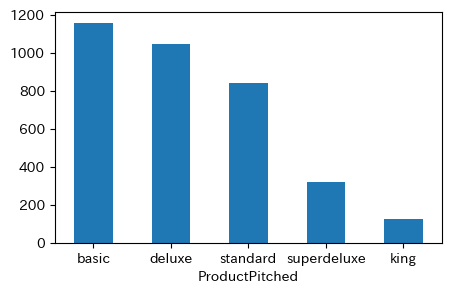

In [ ]:
BarChart(train_ProductPitched)

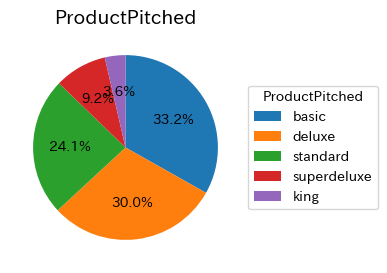

In [ ]:
PieChart(train_ProductPitched)

### 10.PreferredPropertyStarÔºà„Éõ„ÉÜ„É´ÊñΩË®≠„ÅÆÂÑ™ÂÖàË©ï‰æ°Ôºâ

- **Â∞∫Â∫¶**: È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
  - **Ë™¨Êòé**: `PreferredPropertyStar` „ÅØ„ÄÅÈ°ßÂÆ¢„ÅåÂ∏åÊúõ„Åô„Çã„Éõ„ÉÜ„É´ÊñΩË®≠„ÅÆ„É©„É≥„ÇØ„ÇíÁ§∫„Åô„Éá„Éº„Çø„Åß„Åô„ÄÇ„É©„É≥„ÇØ„Å´„ÅØËá™ÁÑ∂„Å™È†ÜÂ∫è„Åå„ÅÇ„Çä„ÄÅ‰æã„Åà„Å∞„Äå3„Å§Êòü„Äç„Çà„Çä„Äå5„Å§Êòü„Äç„ÅÆÊñπ„ÅåÈ´ò„ÅÑ„É©„É≥„ÇØ„Åß„Åô„Åå„ÄÅ„Åù„ÅÆÈñìÈöî„ÅåÁ≠â„Åó„ÅÑ„Å®„ÅØÈôê„Çâ„Å™„ÅÑ„Åü„ÇÅ„ÄÅÈ†ÜÂ∫èÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: ÂêÑ„Éõ„ÉÜ„É´„É©„É≥„ÇØ„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÈ°ßÂÆ¢„ÅåÂ∏åÊúõ„Åô„Çã„É©„É≥„ÇØ„ÅÆÂàÜÂ∏É„ÇíÊØîËºÉ„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑ„Éõ„ÉÜ„É´„É©„É≥„ÇØ„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

In [ ]:
# PreferredPropertyStar È†ÜÂ∫èÂ∞∫Â∫¶
train_x['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    2147
4.0    1145
5.0     197
Name: count, dtype: int64

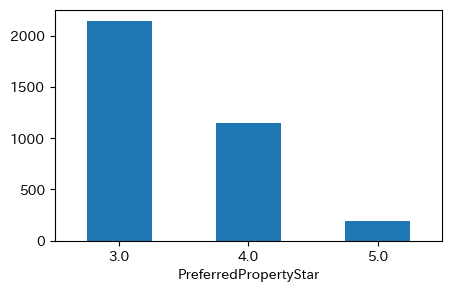

In [ ]:
BarChart(train_x['PreferredPropertyStar'])

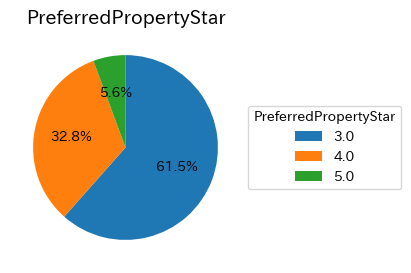

In [ ]:
PieChart(train_x['PreferredPropertyStar'])

### 11.NumberOfTripsÔºàÂπ¥ÈñìÊóÖË°åÂõûÊï∞Ôºâ

- **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
  - **Ë™¨Êòé**: `NumberOfTrips` „ÅØ„ÄÅÈ°ßÂÆ¢„ÅÆÂπ¥ÈñìÊóÖË°åÂõûÊï∞„ÇíÁ§∫„ÅôÊï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇÊóÖË°åÂõûÊï∞„ÅØÈÄöÂ∏∏Â∞ëÊï∞„ÅÆÈõ¢Êï£ÂÄ§„Åß„ÄÅ„Åõ„ÅÑ„Åú„ÅÑÂπ¥8Âõû„Åæ„Åß„Åß„ÅÇ„Çã„Åü„ÇÅ„ÄÅÂêÑÂõûÊï∞„Åî„Å®„ÅÆÈ†ªÂ∫¶„ÇíÊääÊè°„Åô„Çã„Åì„Å®„ÅåÈáçË¶Å„Åß„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: ÊóÖË°åÂõûÊï∞„ÅåÂ∞ëÊï∞„ÅÆÈõ¢Êï£ÂÄ§„Åß„ÅÇ„ÇãÂ†¥Âêà„ÄÅÂêÑÊóÖË°åÂõûÊï∞„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈùûÂ∏∏„Å´ÊúâÂäπ„Åß„Åô„ÄÇÂêÑÊ£í„ÅÆÈ´ò„Åï„Åå„ÄÅ„Åù„Çå„Åû„Çå„ÅÆÊóÖË°åÂõûÊï∞„Åå„Éá„Éº„Çø„Çª„ÉÉ„Éà„Å´‰ΩïÂõûÂá∫Áèæ„Åó„Å¶„ÅÑ„Çã„Åã„ÇíÁ§∫„Åó„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÊóÖË°åÂõûÊï∞„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíÁ§∫„Åô„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÂÖ®‰Ωì„Å´ÂØæ„Åó„Å¶„Å©„ÅÆÂõûÊï∞„ÅåÂ§ö„ÅÑ„Åã„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åß„Åç„Åæ„Åô„ÄÇ

 „Åæ„Å®„ÇÅ  
`NumberOfTrips` „ÅÆ„Çà„ÅÜ„Å™Â∞ëÊï∞„ÅÆÈõ¢Êï£ÂÄ§„Éá„Éº„Çø„Åß„ÅØ„ÄÅ**Ê£í„Ç∞„É©„Éï** „ÅåÊúÄ„ÇÇÈÅ©Âàá„Åß„Åô„ÄÇÊóÖË°åÂõûÊï∞„ÅÆÂàÜÂ∏É„ÇÑÈ†ªÂ∫¶„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åô„Çã„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Åæ„Åü„ÄÅÂÖ®‰Ωì„ÅÆÂâ≤Âêà„ÇíÁ§∫„Åó„Åü„ÅÑÂ†¥Âêà„ÅØ„ÄÅ**ÂÜÜ„Ç∞„É©„Éï** „ÇÇÊúâÂäπ„Åß„Åô„ÄÇ

In [ ]:
# NumberOfTrips numeric
def NumberOfTrips_dealing(str):
    if pd.isnull(str):
        return None
    if 'ÂçäÂπ¥„Å´' in str:
        return 2 * int(str.replace('ÂçäÂπ¥„Å´', '').replace('Âõû', ''))
    elif 'Âπ¥„Å´' in str:
        return int(str.replace('Âπ¥„Å´', '').replace('Âõû', ''))
    elif 'ÂõõÂçäÊúü„Å´' in str:
        return 4 * int(str.replace('ÂõõÂçäÊúü„Å´', '').replace('Âõû', ''))
    else :
        return int(str)

In [ ]:
train_NumberOfTrips = train_x['NumberOfTrips'].apply(NumberOfTrips_dealing)

In [ ]:
train_NumberOfTrips.value_counts()

NumberOfTrips
2.0    1164
3.0     820
5.0     515
1.0     409
7.0     256
4.0     163
6.0     130
8.0      10
Name: count, dtype: int64

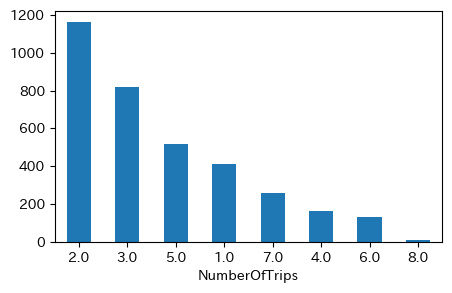

In [ ]:
BarChart(train_NumberOfTrips)

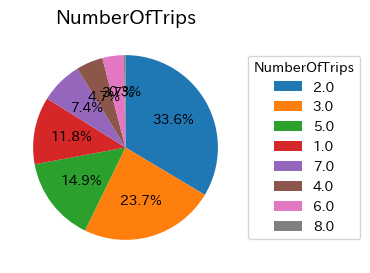

In [ ]:
PieChart(train_NumberOfTrips)

### 12.PassportÔºà„Éë„Çπ„Éù„Éº„Éà„ÅÆÊâÄÊåÅÔºâ

- **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
  - **Ë™¨Êòé**: `Passport` „ÅØ„ÄÅÈ°ßÂÆ¢„Åå„Éë„Çπ„Éù„Éº„Éà„ÇíÊâÄÊåÅ„Åó„Å¶„ÅÑ„Çã„Åã„Å©„ÅÜ„Åã„ÇíÁ§∫„Åô„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„Åô„ÄÇ„Åì„Çå„ÅØ„ÄåÊâÄÊåÅ„Åó„Å¶„ÅÑ„Çã„Äç„Åã„ÄåÊâÄÊåÅ„Åó„Å¶„ÅÑ„Å™„ÅÑ„Äç„ÅÆ2„Å§„ÅÆ„Ç´„ÉÜ„Ç¥„É™„Å´ÂàÜÈ°û„Åï„Çå„ÄÅÈ†ÜÂ∫è„ÇÑÊï∞ÂÄ§ÁöÑ„Å™Èñ¢‰øÇ„Åå„Å™„ÅÑ„Åü„ÇÅÂêçÁæ©Â∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: „Éë„Çπ„Éù„Éº„Éà„ÇíÊâÄÊåÅ„Åó„Å¶„ÅÑ„ÇãÈ°ßÂÆ¢„Å®ÊâÄÊåÅ„Åó„Å¶„ÅÑ„Å™„ÅÑÈ°ßÂÆ¢„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÂêÑ„Éê„Éº„ÅÆÈ´ò„Åï„Åß„ÄÅÊâÄÊåÅ„Å®‰∏çÊâÄÊåÅ„ÅÆÈ°ßÂÆ¢Êï∞„ÇíÊØîËºÉ„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: „Éë„Çπ„Éù„Éº„ÉàÊâÄÊåÅËÄÖ„Å®ÈùûÊâÄÊåÅËÄÖ„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Åù„Çå„Åû„Çå„ÅÆÂâ≤Âêà„Çí‰∏ÄÁõÆ„ÅßÁ¢∫Ë™ç„Åß„Åç„Åæ„Åô„ÄÇ

In [ ]:
train_x['Passport'].value_counts()

Passport
0    3131
1     358
Name: count, dtype: int64

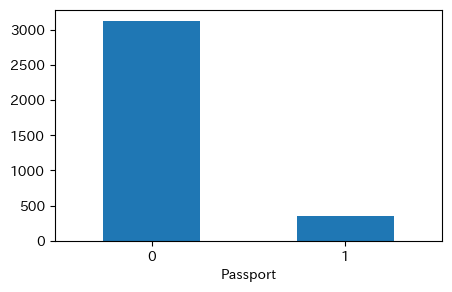

In [ ]:
BarChart(train_x['Passport'])

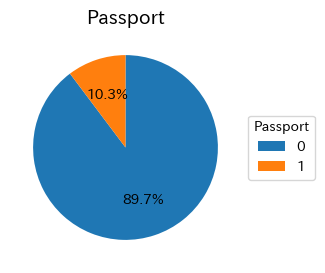

In [ ]:
PieChart(train_x['Passport'])

### 13.PitchSatisfactionScoreÔºàÂ£≤„ÇäËæº„Åø„ÅÆÊ∫ÄË∂≥Â∫¶„Çπ„Ç≥„Ç¢Ôºâ

- **Â∞∫Â∫¶**: È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
  - **Ë™¨Êòé**: `PitchSatisfactionScore` „ÅØ„ÄÅÈ°ßÂÆ¢„ÅåÂñ∂Ê•≠ÊãÖÂΩìËÄÖ„ÅÆÂ£≤„ÇäËæº„Åø„Å´ÂØæ„Åó„Å¶ÊÑü„Åò„ÅüÊ∫ÄË∂≥Â∫¶„ÇíÁ§∫„Åô„Çπ„Ç≥„Ç¢„Åß„Åô„ÄÇ„Åì„ÅÆ„Çπ„Ç≥„Ç¢„Å´„ÅØËá™ÁÑ∂„Å™È†ÜÂ∫è„Åå„ÅÇ„Çä„ÄÅ‰æã„Åà„Å∞„Äå1„Äç„ÅØ„Äå5„Äç„Çà„Çä„ÇÇ‰Ωé„ÅÑÊ∫ÄË∂≥Â∫¶„ÇíÁ§∫„Åó„Åæ„Åô„Åå„ÄÅ„Åù„ÅÆÈñìÈöî„ÅåÁ≠â„Åó„ÅÑ„Å®„ÅØÈôê„Çâ„Å™„ÅÑ„Åü„ÇÅ„ÄÅÈ†ÜÂ∫èÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: ÂêÑÊ∫ÄË∂≥Â∫¶„Çπ„Ç≥„Ç¢„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÈ°ßÂÆ¢„Åå„Å©„ÅÆ„Çπ„Ç≥„Ç¢„ÇíÊúÄ„ÇÇÂ§ö„ÅèÈÅ∏„Çì„Åß„ÅÑ„Çã„Åã„ÇíÊØîËºÉ„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÊ∫ÄË∂≥Â∫¶„Çπ„Ç≥„Ç¢„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÂêÑ„Çπ„Ç≥„Ç¢„ÅÆÂâ≤Âêà„ÇíÁõ¥ÊÑüÁöÑ„Å´ÊääÊè°„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ

- **Â∞∫Â∫¶**: È†ÜÂ∫èÂ∞∫Â∫¶ (Ordinal Scale)
  - **Ë™¨Êòé**: `PitchSatisfactionScore` „ÅØ„ÄÅÈ°ßÂÆ¢„ÅåÂñ∂Ê•≠ÊãÖÂΩìËÄÖ„ÅÆÂ£≤„ÇäËæº„Åø„Å´ÂØæ„Åó„Å¶ÊÑü„Åò„ÅüÊ∫ÄË∂≥Â∫¶„ÇíÁ§∫„Åô„Çπ„Ç≥„Ç¢„Åß„Åô„ÄÇ„Åì„ÅÆ„Çπ„Ç≥„Ç¢„Å´„ÅØËá™ÁÑ∂„Å™È†ÜÂ∫è„Åå„ÅÇ„Çä„ÄÅ‰æã„Åà„Å∞„Äå1„Äç„ÅØ„Äå5„Äç„Çà„Çä„ÇÇ‰Ωé„ÅÑÊ∫ÄË∂≥Â∫¶„ÇíÁ§∫„Åó„Åæ„Åô„Åå„ÄÅ„Åù„ÅÆÈñìÈöî„ÅåÁ≠â„Åó„ÅÑ„Å®„ÅØÈôê„Çâ„Å™„ÅÑ„Åü„ÇÅ„ÄÅÈ†ÜÂ∫èÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: ÂêÑÊ∫ÄË∂≥Â∫¶„Çπ„Ç≥„Ç¢„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÈ°ßÂÆ¢„Åå„Å©„ÅÆ„Çπ„Ç≥„Ç¢„ÇíÊúÄ„ÇÇÂ§ö„ÅèÈÅ∏„Çì„Åß„ÅÑ„Çã„Åã„ÇíÊØîËºÉ„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÊ∫ÄË∂≥Â∫¶„Çπ„Ç≥„Ç¢„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÂêÑ„Çπ„Ç≥„Ç¢„ÅÆÂâ≤Âêà„ÇíÁõ¥ÊÑüÁöÑ„Å´ÊääÊè°„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ

In [ ]:
# PitchSatisfactionScore È†ÜÂ∫èÂ∞∫Â∫¶„Å†„Åë„Å©ÈñìÈöîÂ∞∫Â∫¶ÁöÑË¶ÅÁ¥†„ÅÇ„Çä
train_x['PitchSatisfactionScore'].value_counts()

PitchSatisfactionScore
2    1269
4     739
3     692
1     686
5     103
Name: count, dtype: int64

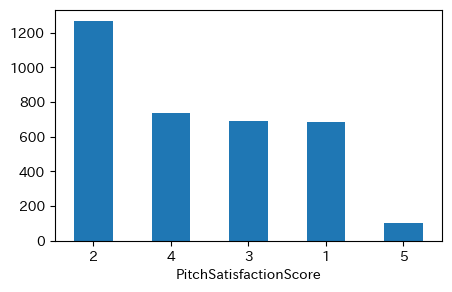

In [ ]:
BarChart(train_x['PitchSatisfactionScore'])

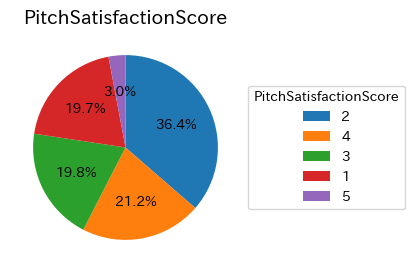

In [ ]:
PieChart(train_x['PitchSatisfactionScore'])

### 14.DesignationÔºàÂΩπËÅ∑Ôºâ

- **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
  - **Ë™¨Êòé**: `Designation` „ÅØ„ÄÅÈ°ßÂÆ¢„ÅÆËÅ∑Â†¥„Å´„Åä„Åë„ÇãÂΩπËÅ∑„ÇíÁ§∫„Åô„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Åß„Åô„ÄÇÂΩπËÅ∑„ÅØ„ÄÅÈ†ÜÂ∫è„ÇÑÊï∞ÂÄ§ÁöÑ„Å™Èñ¢‰øÇ„Åå„Å™„Åè„ÄÅÂçò„Å™„Çã„É©„Éô„É´„Å®„Åó„Å¶Ê©üËÉΩ„Åô„Çã„Åü„ÇÅ„ÄÅÂêçÁæ©Â∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: ÂêÑÂΩπËÅ∑„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ„Å©„ÅÆÂΩπËÅ∑„ÅÆÈ°ßÂÆ¢„ÅåÂ§ö„ÅÑ„Åã„ÇíÊØîËºÉ„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÂΩπËÅ∑„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÂÖ®‰Ωì„Å´ÂØæ„Åó„Å¶„ÄÅ„Å©„ÅÆÂΩπËÅ∑„Åå„Å©„ÅÆ„Åè„Çâ„ÅÑ„ÅÆÂâ≤Âêà„ÇíÂç†„ÇÅ„Å¶„ÅÑ„Çã„Åã„ÇíÁõ¥ÊÑüÁöÑ„Å´ÊääÊè°„Åß„Åç„Åæ„Åô„ÄÇ

In [ ]:
# Designation categorical
def standardize_str(input_str):
    # ÊñáÂ≠óÂàó„ÇíÂçäËßí„Å´Â§âÊèõ„Åó„ÄÅÂ∞èÊñáÂ≠ó„Å´Áµ±‰∏Ä
    input_str = unicodedata.normalize('NFKC', input_str).lower().strip()
    # ‰∏çË¶Å„Å™Á©∫ÁôΩ„ÇÑÁâπÊÆäË®òÂè∑„ÇíÂâäÈô§
    input_str = ''.join(input_str.split())
    input_str = input_str.replace('|', 'l').replace('√ó', 'x').replace('ùò§', 'c').replace('ùñ∫', 'a').replace('ùô≥', 'd')
    # „Åù„ÅÆ‰ªñÁâπÊÆäÊñáÂ≠ó„ÇíÈÄöÂ∏∏„ÅÆËã±Â≠ó„Å´ÁΩÆÊèõ
    input_str = input_str.replace('·óû', 'd').replace('êä°', 'a').replace('ùò≥', 'r').replace('Íì¢', 's').replace('ƒ±', 'i')
    input_str = input_str.replace('Œ≤', 'b').replace('–≤', 'b').replace('—Å', 'c').replace('’ø', 's').replace('œÇ', 'c')
    input_str = input_str.replace('Í≠∞', 'd').replace('Œµ', 'e').replace('Œπ', 'i').replace('Œ±', 'a').replace('’∏', 'n')
    input_str = input_str.replace('—ï', 's').replace('Œº', 'm').replace('–µ', 'e').replace('–∞', 'a').replace('—µ', 'v')
    input_str = input_str.replace('aasic', 'basic')
    return input_str

In [ ]:
train_Designation = train_x['Designation'].apply(standardize_str)

In [ ]:
train_Designation.value_counts()

Designation
executive        1150
manager          1055
seniormanager     854
avp               311
vp                119
Name: count, dtype: int64

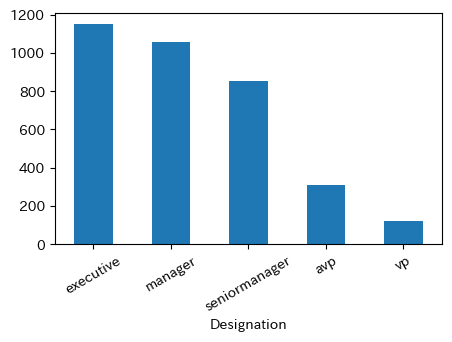

In [ ]:
BarChart(train_Designation, rot=30)

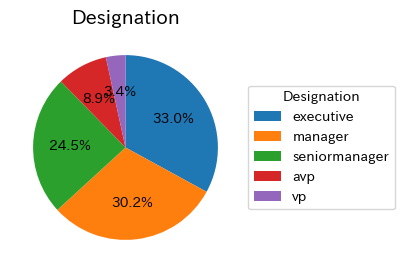

In [ ]:
PieChart(train_Designation)

### 15.MonthlyIncomeÔºàÊúàÂèéÔºâ


- **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)
  - **Ë™¨Êòé**: `MonthlyIncome` „ÅØ„ÄÅÈ°ßÂÆ¢„ÅÆÊúàÂèé„ÇíÁ§∫„ÅôÈÄ£Á∂ö„Åó„ÅüÊï∞ÂÄ§„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§„Åü„ÇÅÊØîÁéáÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇÊúàÂèé„ÅØ„Çº„É≠‰ª•‰∏ä„ÅÆÂÄ§„ÇíÂèñ„Çä„ÄÅÈáëÈ°ç„ÅÆÂ§ßÂ∞è„Å´„Çà„ÇãÊØîËºÉ„ÅåÂèØËÉΩ„Åß„Åô„ÄÇ„Åæ„Åü„ÄÅÈáëÈ°çÈñì„ÅÆÈñìÈöî„ÇÇÁ≠â„Åó„ÅÑ„Åß„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **„Éí„Çπ„Éà„Ç∞„É©„É†**: ÊúàÂèé„ÅÆÂàÜÂ∏É„ÇíË¶ã„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇÂÖ®‰ΩìÁöÑ„Å™ÊúàÂèé„ÅÆÂàÜÂ∏É„ÇÑÂÅè„Çä„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÁÆ±„Å≤„ÅíÂõ≥**: ÊúàÂèé„ÅÆ‰∏≠Â§ÆÂÄ§„ÇÑÂõõÂàÜ‰ΩçÁØÑÂõ≤„ÄÅÂ§ñ„ÇåÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Åæ„Åô„ÄÇ„Éá„Éº„Çø„ÅÆ‰∏≠ÂøÉÂÇæÂêë„ÇÑÊï£„Çâ„Å∞„ÇäÂÖ∑Âêà„ÄÅÁï∞Â∏∏ÂÄ§„ÇíÊääÊè°„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ

In [ ]:
# MonthlyIncome numeric
def MonthlyIncome_dealing(input_str):
    if pd.isnull(input_str):
        return None
    if 'ÊúàÂèé' in input_str:
        return 10000 * float(input_str.replace('ÊúàÂèé', '').replace('‰∏áÂÜÜ', ''))
    elif '‰∏áÂÜÜ' in input_str:
        return 10000 * float(input_str.replace('‰∏áÂÜÜ', ''))
    else:
        return float(input_str)

In [ ]:
train_MothlyIncom = train_x['MonthlyIncome'].apply(MonthlyIncome_dealing)

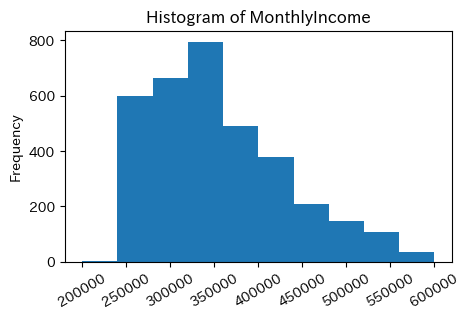

In [ ]:
HistChart(train_MothlyIncom, rot=30)

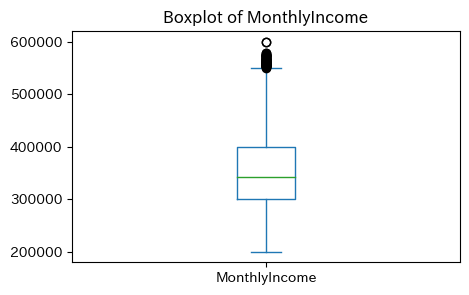

In [ ]:
BoxChart(train_MothlyIncom)

### 16.customer_infoÔºàÈ°ßÂÆ¢ÊÉÖÂ†±Ôºâ

`customer_info` „Å®„ÅÑ„ÅÜ„Éï„Ç£„Éº„É´„Éâ„ÅØ„ÄÅÈ°ßÂÆ¢„Å´Èñ¢„Åô„ÇãË§áÊï∞„ÅÆÊÉÖÂ†±„ÅåÂê´„Åæ„Çå„Å¶„Åä„Çä„ÄÅ„Åù„ÅÆÂÜÖÂÆπ„Å´Âü∫„Å•„ÅÑ„Å¶‰ª•‰∏ã„ÅÆ3„Å§„ÅÆ„Ç´„ÉÜ„Ç¥„É™„Å´ÂàÜÈ°û„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ

1. `married`ÔºàÂ©öÂßªÁä∂Ê≥ÅÔºâ
- **Ë™¨Êòé**: È°ßÂÆ¢„ÅåÁµêÂ©ö„Åó„Å¶„ÅÑ„Çã„Åã„Å©„ÅÜ„Åã„ÄÅ„Åæ„Åü„ÅØÈõ¢Â©ö„Åó„Å¶„ÅÑ„Çã„Åã„Å™„Å©„ÅÆÂ©öÂßªÁä∂Ê≥Å„Å´Èñ¢„Åô„ÇãÊÉÖÂ†±„Åß„Åô„ÄÇ
- **‰æã**: "Êú™Â©ö", "Êó¢Â©ö", "Èõ¢Â©öÊ∏à„Åø", "Áã¨Ë∫´" „Å™„Å©„ÄÇ

2. `car_possession`ÔºàËªä„ÅÆÊâÄÊúâÁä∂Ê≥ÅÔºâ
- **Ë™¨Êòé**: È°ßÂÆ¢„ÅåËªä„ÇíÊâÄÊúâ„Åó„Å¶„ÅÑ„Çã„Åã„Å©„ÅÜ„Åã„Å´Èñ¢„Åô„ÇãÊÉÖÂ†±„Åß„Åô„ÄÇ
- **‰æã**: "Ëªä„ÅÇ„Çä", "Ëªä„Å™„Åó", "Ëá™ÂãïËªäÊâÄÊúâ", "Ëá™ÂãïËªäÊú™ÊâÄÊúâ" „Å™„Å©„ÄÇ

3. `offspring`ÔºàÂ≠ê‰æõ„ÅÆÊúâÁÑ°„ÇÑ‰∫∫Êï∞Ôºâ
- **Ë™¨Êòé**: È°ßÂÆ¢„Å´Â≠ê‰æõ„Åå„ÅÑ„Çã„Åã„Å©„ÅÜ„Åã„ÄÅ„Åæ„Åü„ÅØÂ≠ê‰æõ„ÅÆ‰∫∫Êï∞„Å´Èñ¢„Åô„ÇãÊÉÖÂ†±„Åß„Åô„ÄÇ„Åæ„Åü„ÄÅÂ≠ê‰æõ„ÅÆÊï∞„Åå‰∏çÊòé„Åß„ÅÇ„Çã„Åã„Å©„ÅÜ„Åã„ÇÇÂê´„Åæ„Çå„Åæ„Åô„ÄÇ
- **‰æã**: "Â≠ê‰æõ„Å™„Åó", "Â≠ê‰æõ1‰∫∫", "Â≠ê‰æõ2‰∫∫", "Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé" „Å™„Å©„ÄÇ

In [ ]:
# customer_info
def customer_info_dealing(input_str):
    # ÊñáÂ≠óÂàó„ÇíÂçäËßí„Å´Â§âÊèõ„Åó„ÄÅÂ∞èÊñáÂ≠ó„Å´Áµ±‰∏Ä
    input_str = unicodedata.normalize('NFKC', input_str).lower().strip()
    # ‰∏çË¶Å„Å™Á©∫ÁôΩ„ÇÑÁâπÊÆäË®òÂè∑„ÇíÂâäÈô§
    input_str = input_str.replace('/', ' ').replace('Ôºè', ' ').replace('„ÄÅ', ' ').replace('„ÄÄ', ' ')
    input_str = input_str.replace('\u3000', ' ').replace('\t', ' ').replace('\n', ' ')
    input_str = re.sub(r'(?<=\S)\s+(?=\S)', ',', input_str, count=2)
    return input_str

In [ ]:
train_customer_info = train_x['customer_info'].apply(customer_info_dealing)

In [ ]:
train_customer_info.head()

0        Êú™Â©ö,ËªäÊú™ÊâÄÊåÅ,Â≠ê‰æõ„Å™„Åó
1       Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó
2    ÁµêÂ©öÊ∏à„Åø,Ëá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó
3       Èõ¢Â©öÊ∏à„Åø,ËªäÊâÄÊåÅ,Â≠ê‰æõÁÑ°„Åó
4           Áã¨Ë∫´,ËªäÊâÄÊåÅ,ÁÑ°Â≠ê
Name: customer_info, dtype: object

In [ ]:
train_customer_info_3 = train_customer_info.str.split(',', n=2, expand=True)

In [ ]:
train_married = train_customer_info_3[0]
train_car = train_customer_info_3[1]
train_offspring = train_customer_info_3[2]

#### 16-1.marriedÔºàÂ©öÂßªÁä∂Ê≥ÅÔºâ

- **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
  - **Ë™¨Êòé**: `married` „ÅØ„ÄÅÈ°ßÂÆ¢„ÅÆÂ©öÂßªÁä∂Ê≥Å„ÇíÁ§∫„Åô„Éá„Éº„Çø„Åß„ÅÇ„Çä„ÄÅ„ÄåÊú™Â©ö„Äç„ÄåÊó¢Â©ö„Äç„ÄåÈõ¢Â©öÊ∏à„Åø„Äç„Å™„Å©„ÅÆ„Ç´„ÉÜ„Ç¥„É™„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ„Åì„Çå„Çâ„ÅÆ„Ç´„ÉÜ„Ç¥„É™„Å´„ÅØÈ†ÜÂ∫è„Åå„Å™„Åè„ÄÅÂçò„Å™„Çã„É©„Éô„É´„Å®„Åó„Å¶Ê©üËÉΩ„Åô„Çã„Åü„ÇÅ„ÄÅÂêçÁæ©Â∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ
  
- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: ÂêÑÂ©öÂßªÁä∂Ê≥Å„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ„Å©„ÅÆÂ©öÂßªÁä∂Ê≥Å„ÅÆÈ°ßÂÆ¢„ÅåÊúÄ„ÇÇÂ§ö„ÅÑ„Åã„ÇíÊØîËºÉ„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑÂ©öÂßªÁä∂Ê≥Å„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÂÖ®‰Ωì„Å´ÂØæ„Åó„Å¶ÂêÑÂ©öÂßªÁä∂Ê≥Å„ÅÆÂâ≤Âêà„ÇíÁõ¥ÊÑüÁöÑ„Å´ÊääÊè°„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ

In [ ]:
!pip install japanize-matplotlib -q
import japanize_matplotlib

In [ ]:
train_married.value_counts()

0
ÁµêÂ©öÊ∏à„Åø    1384
Èõ¢Â©öÊ∏à„Åø     878
Áã¨Ë∫´       646
Êú™Â©ö       581
Name: count, dtype: int64

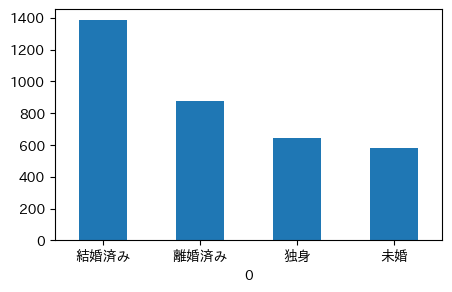

In [ ]:
BarChart(train_married)

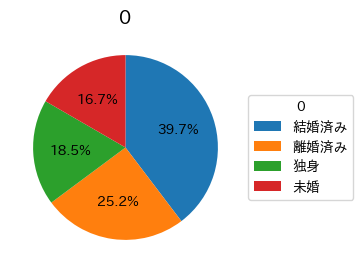

In [ ]:
PieChart(train_married)

#### 16-2.car_possession ÔºàËªä„ÅÆÊâÄÊúâÁä∂Ê≥ÅÔºâ

- **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)
  - **Ë™¨Êòé**: `car_possession` „ÅØ„ÄÅÈ°ßÂÆ¢„ÅåËªä„ÇíÊâÄÊúâ„Åó„Å¶„ÅÑ„Çã„Åã„Å©„ÅÜ„Åã„ÇíÁ§∫„Åô„Éá„Éº„Çø„Åß„Åô„ÄÇ„ÄåËªä„ÅÇ„Çä„Äç„ÄåËªä„Å™„Åó„Äç„Å™„Å©„ÅÆ„Ç´„ÉÜ„Ç¥„É™„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„Åå„ÄÅ„Åì„Çå„Çâ„ÅÆ„Ç´„ÉÜ„Ç¥„É™„Å´„ÅØÈ†ÜÂ∫è„Åå„Å™„Åè„ÄÅÂçò„Å™„Çã„É©„Éô„É´„Å®„Åó„Å¶Ê©üËÉΩ„Åô„Çã„Åü„ÇÅ„ÄÅÂêçÁæ©Â∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: ÂêÑËªä„ÅÆÊâÄÊúâÁä∂Ê≥Å„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ„Å©„ÅÆÊâÄÊúâÁä∂Ê≥Å„ÅåÊúÄ„ÇÇÂ§ö„ÅÑ„Åã„ÇíÊØîËºÉ„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: ÂêÑËªä„ÅÆÊâÄÊúâÁä∂Ê≥Å„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÂÖ®‰Ωì„Å´ÂØæ„Åó„Å¶ÂêÑÊâÄÊúâÁä∂Ê≥Å„ÅÆÂâ≤Âêà„ÇíÁõ¥ÊÑüÁöÑ„Å´ÊääÊè°„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ

In [ ]:
# car_possesion categorival(dummy)
def car_possesion_dealing(input_str):
    if input_str in ['ËªäÊú™ÊâÄÊåÅ', 'Ëá™ÂãïËªäÊú™ÊâÄÊúâ', 'Ëá™ÂÆ∂Áî®Ëªä„Å™„Åó', '‰πóÁî®Ëªä„Å™„Åó', 'Ëªä„Å™„Åó', 'Ëªä‰øùÊúâ„Å™„Åó', 0]:
        return "Ëªä„ÅÇ„Çä"
    elif input_str in ['ËªäÊâÄÊåÅ', 'Ëá™ÂãïËªäÊâÄÊúâ', 'Ëá™ÂÆ∂Áî®Ëªä„ÅÇ„Çä', '‰πóÁî®ËªäÊâÄÊåÅ', 'Ëªä‰øùÊúâ', 'Ëªä„ÅÇ„Çä', 1]:
        return "Ëªä„Å™„Åó"

In [ ]:
train_car_possession = train_car.apply(car_possesion_dealing)

In [ ]:
train_car_possession.value_counts()

1
Ëªä„ÅÇ„Çä    1785
Ëªä„Å™„Åó    1704
Name: count, dtype: int64

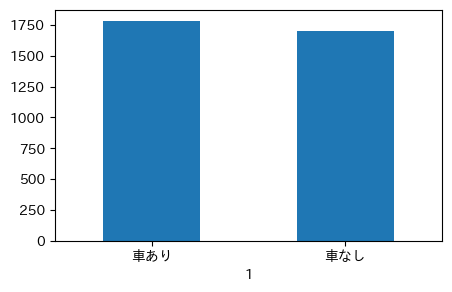

In [ ]:
BarChart(train_car_possession)

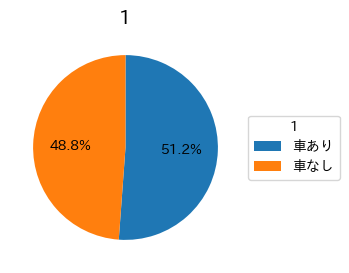

In [ ]:
PieChart(train_car_possession)

#### 16-3.offspring

In [ ]:
# offspring -1‰ª•Â§ñ„ÅØnumeric
def offspring_dealing(input_str):
    if '1' in input_str:
        return 1
    elif '2' in input_str:
        return 2
    elif '3' in input_str:
        return 3
    else:
        return 0

def offspring_identified_dealing(input_str):
    if input_str in ['Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé', '‰∏çÊòé', '„Çè„Åã„Çâ„Å™„ÅÑ', 'Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé', 'Â≠ê„ÅÆÊï∞‰∏çË©≥']:
        return 1
    else:
        return 0

##### 16-3-1.offspring_identified_dealingÔºàÂ≠ê‰æõ„ÅÆÊúâÁÑ°„Åå‰∏çÊòé„Åã„Å©„ÅÜ„Åã„ÅÆÂá¶ÁêÜÔºâ

- **Â∞∫Â∫¶**: ÂêçÁæ©Â∞∫Â∫¶ (Nominal Scale)

- **Ë™¨Êòé**: `offspring_identified_dealing` „ÅØ„ÄÅÈ°ßÂÆ¢„ÅÆÂ≠ê‰æõ„ÅÆÊúâÁÑ°„Åå‰∏çÊòé„Åã„Å©„ÅÜ„Åã„ÇíÁ§∫„Åô„Éá„Éº„Çø„ÇíÂá¶ÁêÜ„Åô„Çã„ÇÇ„ÅÆ„Åß„Åô„ÄÇ„Åì„ÅÆ„Éá„Éº„Çø„ÅØ„ÄÅ„ÄåÂ≠ê‰æõ„ÅÆÊúâÁÑ°„Åå‰∏çÊòé„Åß„ÅÇ„Çã„Åã„Å©„ÅÜ„Åã„Äç„Çí‰∫å„Å§„ÅÆ„Ç´„ÉÜ„Ç¥„É™„ÅßË°®„Åó„Åæ„Åô„ÄÇ‰∏çÊòé„Å™Â†¥Âêà„ÅØ„Äå1„Äç„ÄÅÊòéÁ¢∫„Å´ÂàÜ„Åã„Å£„Å¶„ÅÑ„ÇãÂ†¥Âêà„ÅØ„Äå0„Äç„Å®„Åó„ÄÅÈ†ÜÂ∫è„Åå„Å™„ÅÑ„Åü„ÇÅÂêçÁæ©Â∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ

- **ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï**:
  - **Ê£í„Ç∞„É©„Éï**: Â≠ê‰æõ„ÅÆÊúâÁÑ°„Åå‰∏çÊòé„Å™„Ç±„Éº„Çπ„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ„Å©„Çå„Å†„Åë„ÅÆ„Éá„Éº„Çø„Åå‰∏çÊòé„Åã„ÇíÊØîËºÉ„Åß„Åç„Åæ„Åô„ÄÇ
  - **ÂÜÜ„Ç∞„É©„Éï**: Â≠ê‰æõ„ÅÆÊúâÁÑ°„Åå‰∏çÊòé„Å™„Ç±„Éº„Çπ„ÅåÂÖ®‰Ωì„ÅÆ‰∏≠„ÅßÂç†„ÇÅ„ÇãÂâ≤Âêà„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ‰∏çÊòé„Å™„Ç±„Éº„Çπ„ÅÆÂâ≤Âêà„ÇíÁõ¥ÊÑüÁöÑ„Å´ÊääÊè°„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ

In [ ]:
train_offsprint_offspring_identified_dealing = train_offspring.apply(offspring_identified_dealing)

In [ ]:
train_offsprint_offspring_identified_dealing.name = 'offspring_identified_dealing'

In [ ]:
train_offsprint_offspring_identified_dealing.value_counts()

offspring_identified_dealing
0    3452
1      37
Name: count, dtype: int64

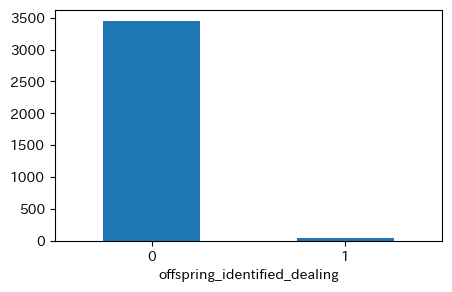

In [ ]:
BarChart(train_offsprint_offspring_identified_dealing)

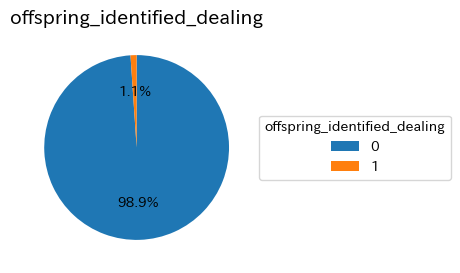

In [ ]:
PieChart(train_offsprint_offspring_identified_dealing)

##### 16-3-2.offspring_dealingÔºàÂ≠ê‰æõ„ÅÆÊúâÁÑ°„Éª‰∫∫Êï∞„ÅÆÂá¶ÁêÜÔºâ


- **Â∞∫Â∫¶**: ÊØîÁéáÂ∞∫Â∫¶ (Ratio Scale)

- **Ë™¨Êòé**: offspring_dealing „ÅØ„ÄÅÈ°ßÂÆ¢„ÅÆÂ≠ê‰æõ„ÅÆ‰∫∫Êï∞„ÇíÁ§∫„Åô„Éá„Éº„Çø„ÇíÂá¶ÁêÜ„Åô„Çã„ÇÇ„ÅÆ„Åß„Åô„ÄÇ„Åì„ÅÆ„Éá„Éº„Çø„ÅØ„ÄÅÈ°ßÂÆ¢„Åå‰Ωï‰∫∫„ÅÆÂ≠ê‰æõ„ÇíÊåÅ„Å£„Å¶„ÅÑ„Çã„Åã„ÇíÁ§∫„Åó„ÄÅ„Çº„É≠„ÅåÊÑèÂë≥„ÇíÊåÅ„Å§Êï∞ÂÄ§„Éá„Éº„Çø„Å®„Åó„Å¶Êâ±„Çè„Çå„Åæ„Åô„ÄÇÂ≠ê‰æõ„Åå„ÅÑ„Å™„ÅÑÂ†¥Âêà„ÅØ„Äå0„Äç„Å®„Åó„ÄÅÂ≠ê‰æõ„Åå1‰∫∫„ÅÑ„ÇãÂ†¥Âêà„ÅØ„Äå1„Äç„ÄÅ2‰∫∫„ÅÑ„ÇãÂ†¥Âêà„ÅØ„Äå2„Äç„Å™„Å©„Å®Ë°®„Åï„Çå„Åæ„Åô„ÄÇ„Çº„É≠‰ª•‰∏ä„ÅÆÂÄ§„ÇíÂèñ„Çä„ÄÅ‰∫∫Êï∞Èñì„ÅÆÈñìÈöî„ÅåÁ≠â„Åó„ÅÑ„Åü„ÇÅ„ÄÅÊØîÁéáÂ∞∫Â∫¶„Å´ÂàÜÈ°û„Åï„Çå„Åæ„Åô„ÄÇ

ÈÅ©Âàá„Å™ÂèØË¶ñÂåñÊñπÊ≥ï:

- **Ê£í„Ç∞„É©„Éï**: ÂêÑÂ≠ê‰æõ„ÅÆ‰∫∫Êï∞„ÅÆÈ†ªÂ∫¶„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ„Å©„ÅÆ‰∫∫Êï∞„ÅåÊúÄ„ÇÇÂ§ö„ÅÑ„Åã„ÇíÊØîËºÉ„Åß„Åç„Åæ„Åô„ÄÇ  
- **„Éí„Çπ„Éà„Ç∞„É©„É†**: Â≠ê‰æõ„ÅÆ‰∫∫Êï∞„ÅÆÂàÜÂ∏É„ÇíË¶ñË¶öÂåñ„Åô„Çã„Åü„ÇÅ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÂÖ®‰ΩìÁöÑ„Å™ÂàÜÂ∏É„ÇÑÂÅè„Çä„ÇíÁ¢∫Ë™ç„Åß„Åç„Åæ„Åô„ÄÇ

In [ ]:
train_offsprint_offspring_dealing = train_offspring.apply(offspring_dealing)

In [ ]:
train_offsprint_offspring_dealing.name = 'offspring_dealing'

In [ ]:
train_offsprint_offspring_dealing.value_counts()

offspring_dealing
1    1570
0    1022
2     824
3      73
Name: count, dtype: int64

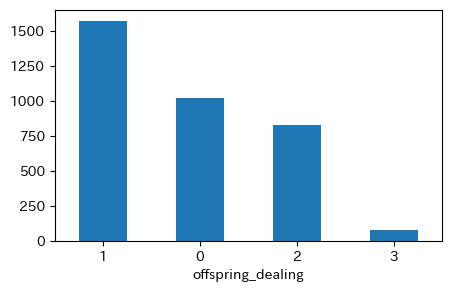

In [ ]:
BarChart(train_offsprint_offspring_dealing)

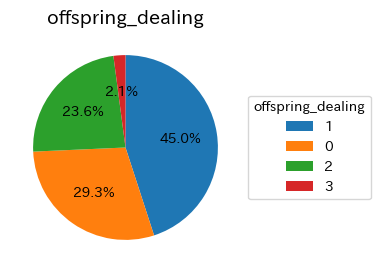

In [ ]:
PieChart(train_offsprint_offspring_dealing)

## ‰∫åÂ§âÈáè„Éá„Éº„Çø„ÅÆÂàÜÊûê

ÁõÆÁöÑÂ§âÊï∞„Åå„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„Å™„ÅÆ„Åß„ÄÅË™¨ÊòéÂ§âÊï∞„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Å´„Çà„Å£„Å¶‰ª•‰∏ã„ÅÆÂèØË¶ñÂåñ„ÅåÈÅ©Âàá„Å®ËÄÉ„Åà„Çâ„Çå„Åæ„Åô„ÄÇ

 1. **Ë™¨ÊòéÂ§âÊï∞„ÅåÈÄ£Á∂öÈáè„ÅÆÂ†¥Âêà**
   - **ÁÆ±„Å≤„ÅíÂõ≥**: ÈÄ£Á∂ö„Éá„Éº„Çø„ÅÆÂàÜÂ∏É„ÇÑ‰∏≠ÂøÉÂÇæÂêë„ÄÅÂ§ñ„ÇåÂÄ§„ÇíË¶ñË¶öÁöÑ„Å´ÊääÊè°„Åô„Çã„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÁâπ„Å´„ÄÅÁõÆÁöÑÂ§âÊï∞Ôºà„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„ÇøÔºâ„Å´„Çà„Çã„Ç∞„É´„Éº„ÉóÈñì„ÅÆÊØîËºÉ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ
   - **„Éì„É≥ÂàÜ„Åë„Å®Á©ç„Åø‰∏ä„ÅíÊ£í„Ç∞„É©„Éï**: ÈÄ£Á∂ö„Éá„Éº„Çø„Çí„Éì„É≥„Å´ÂàÜ„Åë„Çã„Åì„Å®„Åß„ÄÅ„Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„Å®„Åó„Å¶Êâ±„ÅÜ„Åì„Å®„Åå„Åß„Åç„ÄÅ„Åù„ÅÆÂæåÁ©ç„Åø‰∏ä„ÅíÊ£í„Ç∞„É©„Éï„ÅßÊàêÁ¥ÑÁéá„ÇÑÂàÜÂ∏É„ÇíË¶ñË¶öÂåñ„Åß„Åç„Åæ„Åô„ÄÇ„Åì„Çå„ÅØ„ÄÅÂÖ®‰Ωì„ÅÆ„Éà„É¨„É≥„Éâ„ÇÑ„Ç∞„É´„Éº„Éó„ÅÆÈÅï„ÅÑ„Çí„Çà„ÇäÁõ¥ÊÑüÁöÑ„Å´ÁêÜËß£„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ

 2. **Ë™¨ÊòéÂ§âÊï∞„ÅåÈõ¢Êï£ÂÄ§„ÅÆÂ†¥Âêà**
   - **Á©ç„Åø‰∏ä„ÅíÊ£í„Ç∞„É©„Éï**: Èõ¢Êï£„Éá„Éº„Çø„ÅÆÂ†¥Âêà„ÄÅÂêÑ„Ç´„ÉÜ„Ç¥„É™„ÅÆÈ†ªÂ∫¶„ÇÑÂâ≤Âêà„ÇíË¶ñË¶öÁöÑ„Å´ÊØîËºÉ„Åô„Çã„Åü„ÇÅ„Å´ÈùûÂ∏∏„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÁõÆÁöÑÂ§âÊï∞Ôºà„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„ÇøÔºâ„Å®„ÅÆÈñ¢‰øÇ„ÇíÁ§∫„Åô„ÅÆ„Å´ÊúâÂäπ„Åß„Åô„ÄÇ


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def BarChartDuble(x, y, rot=0):
    # xËª∏„Å®yËª∏„ÅÆÂêçÂâç„ÇíÂèñÂæó
    xlabel = x.name
    ylabel = y.name
    title = f'{xlabel} vs {ylabel}'

    # xËª∏„Åî„Å®„ÅÆÊàêÁ¥Ñ„ÉªÈùûÊàêÁ¥Ñ„ÅÆ„Ç´„Ç¶„É≥„Éà
    crosstab_data = pd.crosstab(x, y)

    # Á©ç„Åø‰∏ä„ÅíÊ£í„Ç∞„É©„Éï„ÅÆË°®Á§∫
    ax = crosstab_data.plot(kind='bar', stacked=True, figsize=(5, 3))
    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel(xlabel)

    # ÂêÑ„Éê„Éº„Å´ÊàêÁ¥ÑÁéá„ÇíË°®Á§∫
    for i, container in enumerate(ax.containers):
        for j, rect in enumerate(container):
            height = rect.get_height()
            if i == 1:  # ÊàêÁ¥Ñ„Åó„ÅüÂ†¥Âêà„ÅÆ„ÅøË°®Á§∫Ôºài == 1„ÅØÊàêÁ¥ÑÊ∏à„Åø„ÅÆ„Éá„Éº„ÇøÔºâ
                # Get the index of the corresponding row in the crosstab
                index = crosstab_data.index[j]
                total = crosstab_data.loc[index].sum()
                percentage = height / total
                x = rect.get_x() + rect.get_width() / 2
                y = rect.get_y() + height + 5  # ÊñáÂ≠ó„ÅåÈáç„Å™„Çâ„Å™„ÅÑ„Çà„ÅÜ„Å´Â∞ë„Åó‰∏ä„Å´Ë°®Á§∫
                ax.annotate(f'{percentage:.2%}', (x, y), ha='center', fontsize=10, color='black')

    plt.xticks(rotation=rot)  # xËª∏„É©„Éô„É´„ÅÆÂõûËª¢ËßíÂ∫¶„ÇíË®≠ÂÆö
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def BoxChartDuble(x, y, figsize=(5, 3)):
    # xËª∏„Å®yËª∏„ÅÆÂêçÂâç„ÇíÂèñÂæó
    xlabel = x.name
    ylabel = y.name
    title = f'{ylabel} vs {xlabel}'

    # ÁÆ±„Å≤„ÅíÂõ≥„ÅÆÊèèÁîª
    plt.figure(figsize=figsize)
    sns.boxplot(x=x, y=y)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


### 1.Age √ó ProdTaken

In [ ]:
# Âπ¥ÈΩ¢„Çí„ÅÑ„Åè„Å§„Åã„ÅÆ„Éì„É≥„Å´ÂàÜ„Åë„Çã
train_age_bins = pd.cut(train_age, bins=[0, 20, 30, 40, 50, 60, 70, 80])

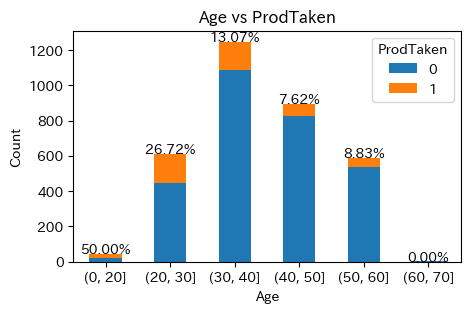

In [ ]:
BarChartDuble(train_age_bins, train_y)

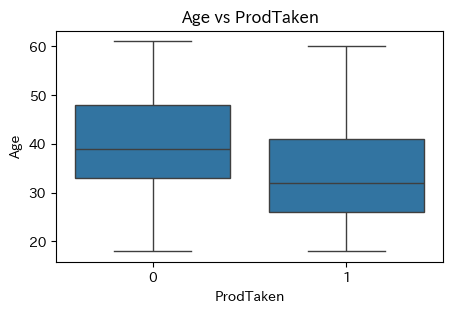

In [ ]:
BoxChartDuble(train_y, train_age)

- **ÊàêÁ¥ÑÁéá**:
  - 20Ê≠≥‰ª•‰∏ã: 50.00%
  - 20-30Ê≠≥: 26.72%
  - 30-40Ê≠≥: 13.07%
  - 40-50Ê≠≥: 7.62%
  - 50-60Ê≠≥: 8.83%
  - 60-70Ê≠≥: 0.00%

- **ÂàÜÊûê**:
  - 20Ê≠≥‰ª•‰∏ã„ÅÆÊàêÁ¥ÑÁéá„ÅåÊúÄ„ÇÇÈ´ò„ÅÑ„Åå„ÄÅ„Çµ„É≥„Éó„É´„Çµ„Ç§„Ç∫„ÅåÈùûÂ∏∏„Å´Â∞ë„Å™„ÅÑ„ÄÇ
  - 30-40Ê≠≥„ÅÆÊàêÁ¥ÑÁéá„ÅåÊØîËºÉÁöÑÈ´ò„ÅÑ„ÄÇ
  - 60Ê≠≥‰ª•‰∏ä„ÅÆÊàêÁ¥ÑÁéá„ÅØ„Çº„É≠„Åß„ÅÇ„Çã„Åü„ÇÅ„ÄÅ„Åì„ÅÆÂ±§„Å∏„ÅÆ„Çø„Éº„Ç≤„ÉÜ„Ç£„É≥„Ç∞„ÅØÈùûÂäπÁéá„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ

### 2.TypeofContact √ó ProdTaken

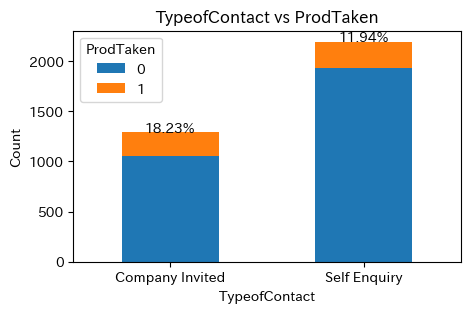

In [ ]:
BarChartDuble(train_x['TypeofContact'], train_y)

- **ÊàêÁ¥ÑÁéá**:
  - Company Invited: 18.23%
  - Self Enquiry: 11.94%

- **ÂàÜÊûê**:
  - Company Invited „ÅÆÈ°ßÂÆ¢„ÅÆÊñπ„Åå Self Enquiry „ÅÆÈ°ßÂÆ¢„Çà„Çä„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
  - ‰ºÅÊ•≠„Åã„Çâ„ÅÆÂãßË™ò„ÅßÊé•Ëß¶„Åó„ÅüÈ°ßÂÆ¢„ÅÆÊñπ„ÅåÊàêÁ¥Ñ„Åó„ÇÑ„Åô„ÅÑ„Åì„Å®„ÅåÁ§∫ÂîÜ„Åï„Çå„Çã„ÄÇ



### 3.CityTier √ó ProdTaken

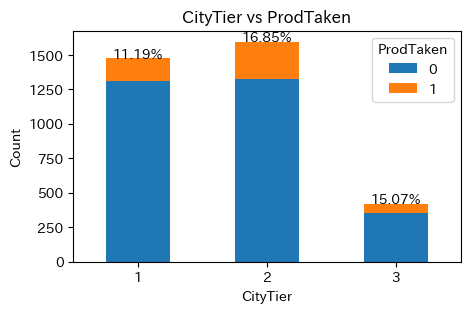

In [ ]:
BarChartDuble(train_x['CityTier'], train_y)

- **ÊàêÁ¥ÑÁéá**:
  - 1: 11.19%
  - 2: 16.85%
  - 3: 15.07%

- **ÂàÜÊûê**:
  - CityTier 2 „Å´„Åä„ÅÑ„Å¶ÊàêÁ¥ÑÁéá„ÅåÊúÄ„ÇÇÈ´ò„ÅÑ„ÄÇ
  - ‰∏≠Ë¶èÊ®°ÈÉΩÂ∏ÇÂ±§„ÅåÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„Åè„ÄÅ„Çø„Éº„Ç≤„ÉÜ„Ç£„É≥„Ç∞„Å´ÊúâÂäπ„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ



### 4.DurationOfPitch √ó ProdTaken

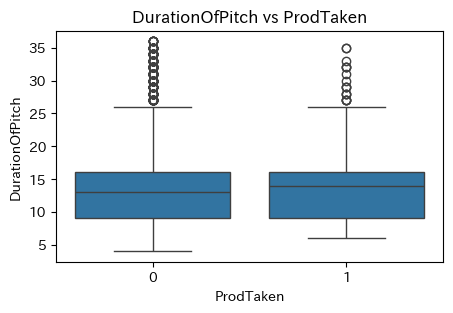

In [ ]:
BoxChartDuble(train_y, train_DurationOfPitch)

In [ ]:
# „Éó„É¨„Çº„É≥ÊôÇÈñì„Çí„Ç´„ÉÜ„Ç¥„É™„Å´ÂàÜ„Åë„Çã
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']
train_DurationOfPitch_bin = pd.cut(train_DurationOfPitch, bins=bins, labels=labels)

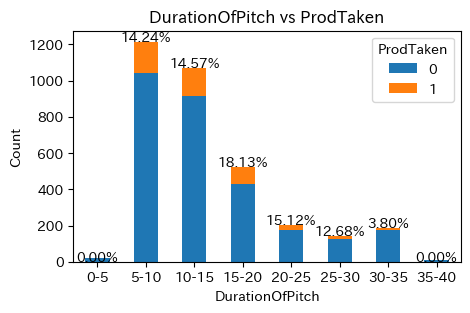

In [ ]:
BarChartDuble(train_DurationOfPitch_bin, train_y)

- **ÊàêÁ¥ÑÁéá**:
  - 0-5ÂàÜ: 0.00%
  - 5-10ÂàÜ: 14.24%
  - 10-15ÂàÜ: 14.57%
  - 15-20ÂàÜ: 18.13%
  - 20-25ÂàÜ: 15.12%
  - 25-30ÂàÜ: 12.68%
  - 30-35ÂàÜ: 3.80%
  - 35-40ÂàÜ: 0.00%

- **ÂàÜÊûê**:
  - „Éó„É¨„Çº„É≥ÊôÇÈñì„Åå15-20ÂàÜ„ÅÆÁØÑÂõ≤„ÅßÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
  - 30ÂàÜ‰ª•‰∏ä„ÅÆ„Éó„É¨„Çº„É≥ÊôÇÈñì„ÅØÈÄÜÂäπÊûú„Åß„ÅÇ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„ÄÇ
  - 0-5ÂàÜ„ÅÆÁü≠ÊôÇÈñì„Éó„É¨„Çº„É≥„ÇÇÊàêÁ¥ÑÁéá„Åå‰Ωé„ÅÑ„Åì„Å®„Åã„Çâ„ÄÅÂçÅÂàÜ„Å™Ë™¨Êòé„ÅåË°å„Çè„Çå„Å™„ÅÑ„Ç±„Éº„Çπ„ÅØÂäπÊûú„ÅåËñÑ„ÅÑ„Å®ËÄÉ„Åà„Çâ„Çå„Åæ„Åô„ÄÇ

„Åì„ÅÆ„Çà„ÅÜ„Å´„ÄÅ15-20ÂàÜÈñì„ÅÆ„Éó„É¨„Çº„É≥„ÉÜ„Éº„Ç∑„Éß„É≥„ÅåÊúÄ„ÇÇÂäπÊûúÁöÑ„Åß„ÅÇ„Çã„Åì„Å®„ÅåÁ§∫ÂîÜ„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ‰∏ÄÊñπ„Åß„ÄÅÈï∑„Åô„Åé„ÇãÔºà30ÂàÜ‰ª•‰∏äÔºâ„Åæ„Åü„ÅØÁü≠„Åô„Åé„ÇãÔºà5ÂàÜ‰ª•‰∏ãÔºâ„ÅÆ„Éó„É¨„Çº„É≥„ÅØ„ÄÅÊàêÁ¥ÑÁéá„Çí‰∏ã„Åí„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„Åü„ÇÅ„ÄÅ„Éó„É¨„Çº„É≥„ÉÜ„Éº„Ç∑„Éß„É≥„ÅÆÈï∑„Åï„ÇíÈÅ©Âàá„Å´Ë™øÊï¥„Åô„Çã„Åì„Å®„ÅåÈáçË¶Å„Åß„Åô„ÄÇ



### 5.Occupation √ó ProdTaken

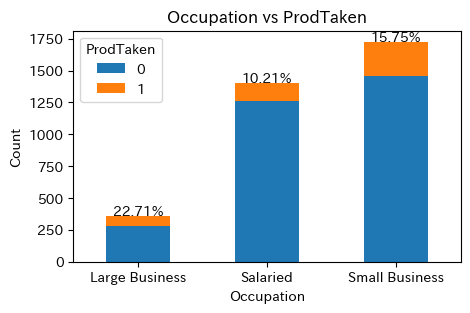

In [ ]:
# Occupation √ó ProdTaken „ÅÆÁ©ç„Åø‰∏ä„ÅíÊ£í„Ç∞„É©„Éï„Çí‰ΩúÊàê
BarChartDuble(train_x['Occupation'], train_y)

- **ÊàêÁ¥ÑÁéá**:
  - Large Business: 22.71%
  - Salaried Occupation: 10.21%
  - Small Business: 15.75%

- **ÂàÜÊûê**:
  - Â§ßË¶èÊ®°„Éì„Ç∏„Éç„Çπ„ÅÆÈ°ßÂÆ¢„ÅåÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
  - Áµ¶‰∏éÊâÄÂæóËÄÖÂ±§„Åß„ÅØÊàêÁ¥ÑÁéá„Åå‰Ωé„Åè„ÄÅ„Ç¢„Éó„É≠„Éº„ÉÅ„ÅÆÊîπÂñÑ„ÅåÂøÖË¶Å„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ



### 6.Gender √ó ProdTaken

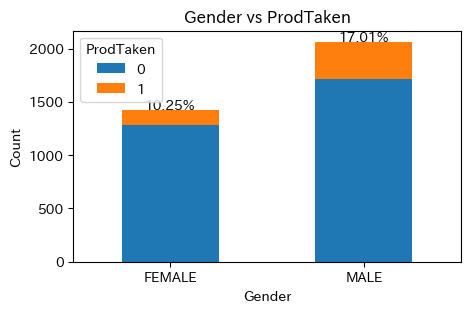

In [ ]:
BarChartDuble(train_Gender, train_y)

- **ÊàêÁ¥ÑÁéá**:
  - Female: 10.25%
  - Male: 17.01%

- **ÂàÜÊûê**:
  - Áî∑ÊÄß„ÅÆÈ°ßÂÆ¢„ÅÆÊñπ„ÅåÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
  - Áî∑ÊÄß„Çø„Éº„Ç≤„ÉÉ„Éà„Å´ÂäπÊûúÁöÑ„Å™Êà¶Áï•„ÇíÂ±ïÈñã„Åô„Çã„Åì„Å®„ÅåÊúâÂäπ„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ



### 7.NumberOfPersonVisiting √ó ProdTaken

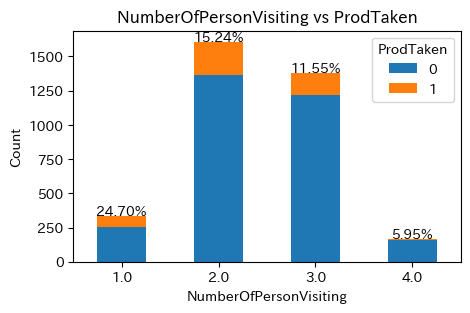

In [ ]:
BarChartDuble(train_x['NumberOfPersonVisiting'], train_y)

- **ÊàêÁ¥ÑÁéá**:
  - 1‰∫∫: 24.70%
  - 2‰∫∫: 15.24%
  - 3‰∫∫: 11.55%
  - 4‰∫∫: 5.95%

- **ÂàÜÊûê**:
  - 1‰∫∫„ÅßË®™„Çå„ÇãÈ°ßÂÆ¢„ÅÆÊàêÁ¥ÑÁéá„ÅåÊúÄ„ÇÇÈ´ò„ÅÑ„ÄÇ
  - ÂêåË°åËÄÖ„ÅÆÊï∞„ÅåÂ¢ó„Åà„Çã„Å®ÊàêÁ¥ÑÁéá„Åå‰Ωé‰∏ã„Åô„ÇãÂÇæÂêë„Åå„ÅÇ„Çã„ÄÇ

### 8.NumberOfFollowups √ó ProdTaken

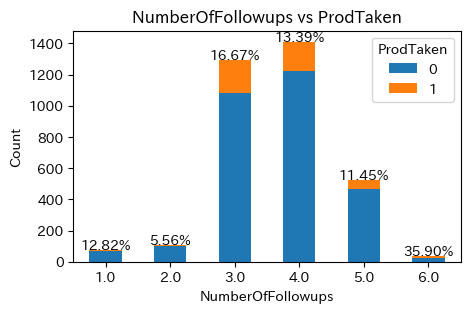

In [ ]:
BarChartDuble(train_NumberOfFollowups, train_y)

- **ÊàêÁ¥ÑÁéá**:
  - 1Âõû: 12.82%
  - 2Âõû: 5.56%
  - 3Âõû: 16.67%
  - 4Âõû: 13.39%
  - 5Âõû: 11.45%
  - 6Âõû: 35.90%

- **ÂàÜÊûê**:
  - „Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„ÉóÂõûÊï∞„ÅåÂ¢ó„Åà„Çã„Å®ÊàêÁ¥ÑÁéá„ÅåÈ´ò„Åè„Å™„ÇãÂÇæÂêë„ÅåË¶ã„Çâ„Çå„Çã„Åå„ÄÅ2ÂõûÁõÆ„Åß„ÅØÊàêÁ¥ÑÁéá„Åå‰Ωé‰∏ã„Åó„Å¶„ÅÑ„Çã„ÄÇ
  - ÈÅ©Âàá„Å™„Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„Éó„ÅÆ„Çø„Ç§„Éü„É≥„Ç∞„ÇíË¶ãÊ•µ„ÇÅ„Çã„Åì„Å®„ÅåÈáçË¶Å„Åß„Åô„ÄÇ



### 9.ProductPitched √ó ProdTaken

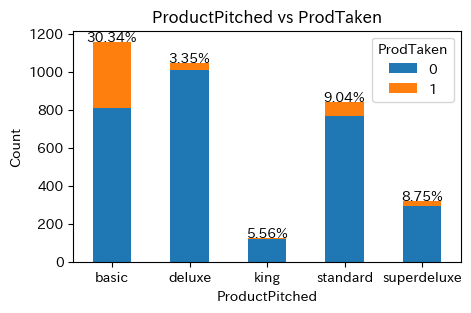

In [ ]:
BarChartDuble(train_ProductPitched, train_y)

- **ÊàêÁ¥ÑÁéá**:
  - Basic: 30.34%
  - Deluxe: 3.35%
  - King: 5.56%
  - Standard: 9.04%
  - Super Deluxe: 8.75%

- **ÂàÜÊûê**:
  - Basic „Éó„É©„É≥„ÅÆÊàêÁ¥ÑÁéá„ÅåÂúßÂÄíÁöÑ„Å´È´ò„ÅÑ„ÄÇ
  - Deluxe „ÇÑ Super Deluxe „ÅØÊàêÁ¥ÑÁéá„Åå‰Ωé„ÅÑ„Åü„ÇÅ„ÄÅ‰æ°Ê†º„ÇÑÂÜÖÂÆπ„ÅÆÂÜçË©ï‰æ°„ÅåÂøÖË¶Å„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ



### 10.PreferredPropertyStar √ó ProdTaken

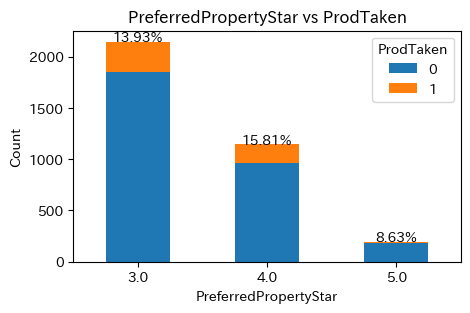

In [ ]:
BarChartDuble(train_x['PreferredPropertyStar'], train_y)

- **ÊàêÁ¥ÑÁéá**:
  - 3: 13.93%
  - 4: 15.81%
  - 5: 8.63%

- **ÂàÜÊûê**:
  - 4„Å§Êòü„Éõ„ÉÜ„É´„ÇíÂ∏åÊúõ„Åô„ÇãÈ°ßÂÆ¢„ÅÆÊàêÁ¥ÑÁéá„ÅåÊúÄ„ÇÇÈ´ò„ÅÑ„ÄÇ
  - 5„Å§Êòü„Éõ„ÉÜ„É´„ÇíÂ∏åÊúõ„Åô„ÇãÈ°ßÂÆ¢„ÅÆÊàêÁ¥ÑÁéá„ÅØ‰Ωé„Åè„ÄÅÈ´òÁ¥öÂøóÂêë„ÅÆÈ°ßÂÆ¢„Å´„ÅØÂà•„ÅÆ„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåÂøÖË¶Å„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ

### 11.NumberOfTrips √ó ProdTaken

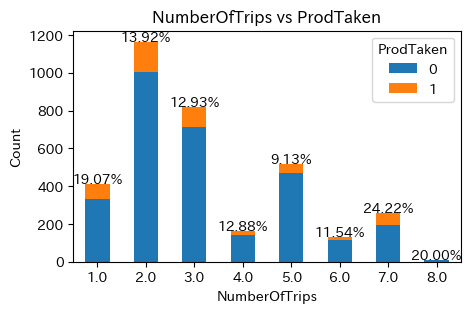

In [ ]:
BarChartDuble(train_NumberOfTrips, train_y)

- **ÊàêÁ¥ÑÁéá**:
  - 1Âõû: 19.07%
  - 2Âõû: 13.92%
  - 3Âõû: 12.93%
  - 4Âõû: 12.88%
  - 5Âõû: 9.13%
  - 6Âõû: 11.54%
  - 7Âõû: 24.22%
  - 8Âõû: 20.00%

- **ÂàÜÊûê**:
  - Âπ¥7Âõû‰ª•‰∏äÊóÖË°å„Åô„ÇãÈ°ßÂÆ¢„ÅØÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
  - ÈÄÜ„Å´Âπ¥5ÂõûÊóÖË°å„Åô„ÇãÈ°ßÂÆ¢„ÅØÊàêÁ¥ÑÁéá„Åå‰Ωé„Åè„ÄÅ„Ç¢„Éó„É≠„Éº„ÉÅ„ÅÆË¶ãÁõ¥„Åó„ÅåÂøÖË¶Å„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ



### 12.Passport √ó ProdTaken

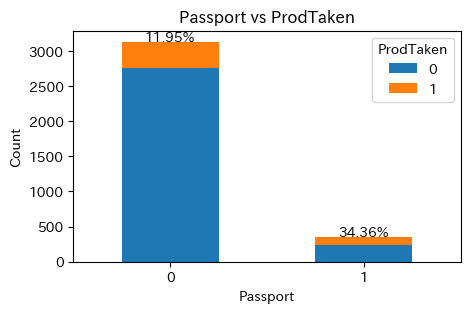

In [ ]:
BarChartDuble(train_x['Passport'], train_y)

- **ÊàêÁ¥ÑÁéá**:
  - 0 (Êú™ÊâÄÊåÅ): 11.95%
  - 1 (ÊâÄÊåÅ): 34.36%

- **ÂàÜÊûê**:
  - „Éë„Çπ„Éù„Éº„Éà„ÇíÊâÄÊåÅ„Åó„Å¶„ÅÑ„ÇãÈ°ßÂÆ¢„ÅØÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
  - Êµ∑Â§ñÊóÖË°å„ÇíË¶ñÈáé„Å´ÂÖ•„Çå„ÅüÊèêÊ°à„ÅåÂäπÊûúÁöÑ„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ



### 13.PitchSatisfactionScore √ó ProdTaken

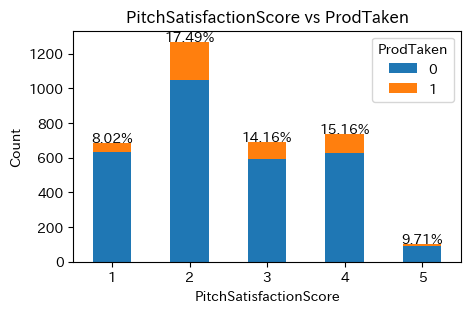

In [ ]:
BarChartDuble(train_x['PitchSatisfactionScore'], train_y)

- **ÊàêÁ¥ÑÁéá**:
  - 1: 8.02%
  - 2: 17.49%
  - 3: 14.16%
  - 4: 15.16%
  - 5: 9.71%

- **ÂàÜÊûê**:
  - PitchSatisfactionScore 2 „ÅÆÊàêÁ¥ÑÁéá„ÅåÊúÄ„ÇÇÈ´ò„ÅÑ„ÄÇ
  - 5 „ÅÆÂ†¥Âêà„ÅØÊàêÁ¥ÑÁéá„Åå‰Ωé„ÅÑ„Åü„ÇÅ„ÄÅÊúüÂæÖ„ÇíÊåÅ„Åü„Åõ„ÇãÊà¶Áï•„ÅåÊúâÂäπ„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ



### 14.Designation √ó ProdTaken

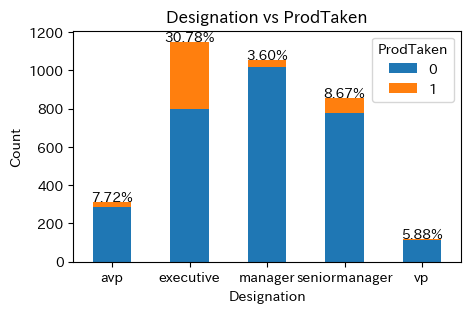

In [ ]:
BarChartDuble(train_Designation, train_y)

- **ÊàêÁ¥ÑÁéá**:
  - AVP: 7.72%
  - Executive: 30.78%
  - Manager: 3.60%
  - Senior Manager: 8.67%
  - VP: 5.88%

- **ÂàÜÊûê**:
  - Executive „ÅÆÊàêÁ¥ÑÁéá„ÅåÈùûÂ∏∏„Å´È´ò„ÅÑ„ÄÇ
  - Manager „É¨„Éô„É´„Åß„ÅØÊàêÁ¥ÑÁéá„Åå‰Ωé„ÅÑ„Åü„ÇÅ„ÄÅÂà•„ÅÆ„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåÂøÖË¶Å„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ



### 15.MonthlyIncome √ó ProdTaken

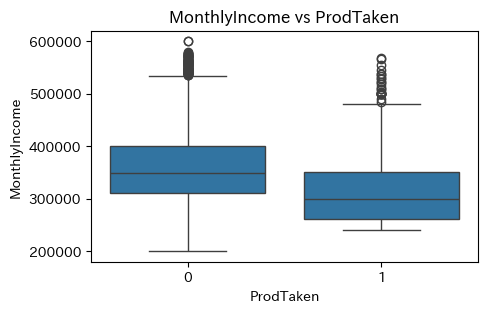

In [ ]:
# MonthlyIncome„Å®ProdTaken„ÅÆÈñ¢‰øÇ„ÇíÁÆ±„Å≤„ÅíÂõ≥„ÅßÂèØË¶ñÂåñ
BoxChartDuble(train_y, train_MothlyIncom)

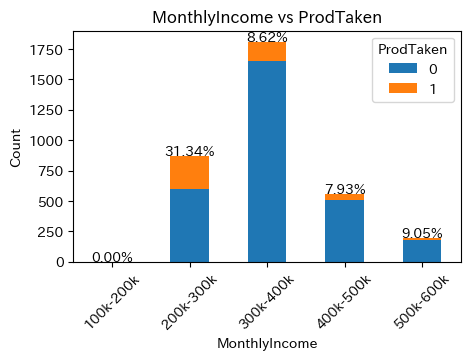

In [ ]:
import pandas as pd

# ÊúàÂèé„Çí„ÅÑ„Åè„Å§„Åã„ÅÆ„Éì„É≥„Å´ÂàÜ„Åë„Çã
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M']
train_MonthlyIncome_bin = pd.cut(train_MothlyIncom, bins=bins, labels=labels)

# Á©ç„Åø‰∏ä„ÅíÊ£í„Ç∞„É©„Éï„ÅßÊàêÁ¥ÑÁéá„ÇíË°®Á§∫
BarChartDuble(train_MonthlyIncome_bin, train_y, rot=45)

   - **ÊàêÁ¥ÑÁéá**:
     - ÊúàÂèé„Åå20‰∏á„Äú30‰∏á: ÊàêÁ¥ÑÁéá„ÅØ31.34%
     - ÊúàÂèé„Åå30‰∏á„Äú40‰∏á: ÊàêÁ¥ÑÁéá„ÅØ8.62%
     - ÊúàÂèé„Åå40‰∏á„Äú50‰∏á: ÊàêÁ¥ÑÁéá„ÅØ7.93%
     - ÊúàÂèé„Åå50‰∏á„Äú60‰∏á: ÊàêÁ¥ÑÁéá„ÅØ9.05%
   - **ÂÇæÂêë**: ÊúàÂèé„Åå‰Ωé„ÅÑ‰∫∫„Åª„Å©ÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇÁâπ„Å´20‰∏á„Äú30‰∏á„ÅÆÊúàÂèé„ÅÆ„Ç∞„É´„Éº„Éó„Åß„ÅØÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„Åì„Å®„Åå„Çè„Åã„Çä„Åæ„Åô„ÄÇ

### 16.married √ó ProdTaken

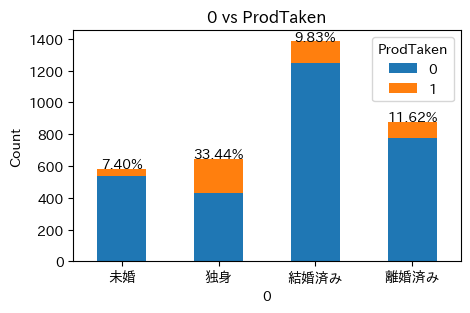

In [ ]:
BarChartDuble(train_married, train_y)

   - **ÊàêÁ¥ÑÁéá**:
     - Êú™Â©ö: ÊàêÁ¥ÑÁéá„ÅØ7.40%
     - Áã¨Ë∫´: ÊàêÁ¥ÑÁéá„ÅØ33.44%
     - ÁµêÂ©öÊ∏à„Åø: ÊàêÁ¥ÑÁéá„ÅØ9.83%
     - Èõ¢Â©öÊ∏à„Åø: ÊàêÁ¥ÑÁéá„ÅØ11.62%
   - **ÂÇæÂêë**: Áã¨Ë∫´„ÅÆ‰∫∫„ÅåÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ„Åù„ÅÆ‰ªñ„ÅÆ„Ç∞„É´„Éº„Éó„Åß„ÅØÊàêÁ¥ÑÁéá„ÅØÊØîËºÉÁöÑ‰Ωé„ÅÑ„ÄÇ

### 17.car_possession √ó ProdTaken

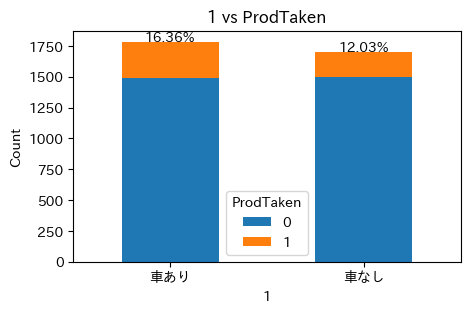

In [ ]:
BarChartDuble(train_car_possession, train_y)

   - **ÊàêÁ¥ÑÁéá**:
     - Ëªä„ÅÇ„Çä: ÊàêÁ¥ÑÁéá„ÅØ16.36%
     - Ëªä„Å™„Åó: ÊàêÁ¥ÑÁéá„ÅØ12.03%
   - **ÂÇæÂêë**: Ëªä„ÇíÊåÅ„Å£„Å¶„ÅÑ„Çã‰∫∫„ÅÆÊñπ„ÅåÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ



### 18.offspring_identified √ó ProdTakenÔºàÂ≠ê‰æõ„ÅÆÊúâÁÑ°„Åå‰∏çÊòé„Åã„Å©„ÅÜ„Åã„ÅÆÂá¶ÁêÜÔºâ

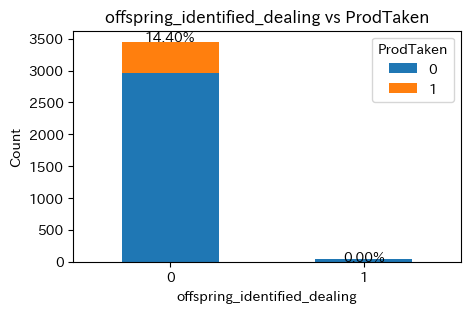

In [ ]:
BarChartDuble(train_offsprint_offspring_identified_dealing, train_y)

- **Â≠ê‰æõ„ÅÆ‰∫∫Êï∞„Åå‰∏çÊòé„Åß„ÅØ„Å™„ÅÑ**: ÊàêÁ¥ÑÁéá„ÅØ14.40%„ÄÇ
- **Â≠ê‰æõ„ÅÆ‰∫∫Êï∞„Åå‰∏çÊòé**: ÊàêÁ¥ÑÁéá„ÅØ0.00%„ÄÇ



### 19.offspring √ó ProdTakenÔºàÂ≠ê‰æõ„ÅÆÊúâÁÑ°„Éª‰∫∫Êï∞„ÅÆÂá¶ÁêÜÔºâ

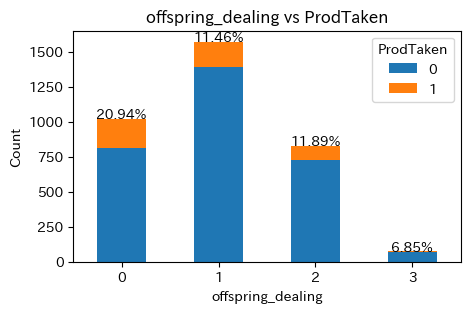

In [ ]:
BarChartDuble(train_offsprint_offspring_dealing, train_y)

- **Â≠ê‰æõ„Å™„Åó**: ÊàêÁ¥ÑÁéá„ÅØ20.94%„ÄÇ
- **Â≠ê‰æõ1‰∫∫**: ÊàêÁ¥ÑÁéá„ÅØ11.46%„ÄÇ
- **Â≠ê‰æõ2‰∫∫**: ÊàêÁ¥ÑÁéá„ÅØ11.89%„ÄÇ
- **Â≠ê‰æõ3‰∫∫**: ÊàêÁ¥ÑÁéá„ÅØ6.85%„ÄÇ

„Åì„ÅÆ„Éá„Éº„Çø„Åã„Çâ„ÄÅÂ≠ê‰æõ„Åå„ÅÑ„Å™„ÅÑÂÆ∂Â∫≠„ÅåÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„Åè„ÄÅÂ≠ê‰æõ„ÅåÂ¢ó„Åà„Çã„Å´„Å§„Çå„Å¶ÊàêÁ¥ÑÁéá„Åå‰Ωé‰∏ã„Åô„ÇãÂÇæÂêë„ÅåË¶ã„Çâ„Çå„Åæ„Åô„ÄÇ

## ÂàÜÊûê„ÅÆ„Åæ„Å®„ÇÅ

„Åì„Çå„Çâ„ÅÆ„Éá„Éº„Çø„Å®ÊàêÁ¥ÑÁéá„ÅÆÂÇæÂêë„Åã„Çâ„ÄÅ„ÅÑ„Åè„Å§„Åã„ÅÆÈáçË¶Å„Å™„Ç§„É≥„Çµ„Ç§„Éà„ÅåÂæó„Çâ„Çå„Åæ„Åô„ÄÇ‰ª•‰∏ã„Å´„ÄÅ„Åù„Çå„Åû„Çå„ÅÆ„Ç´„ÉÜ„Ç¥„É™„Å´„Å§„ÅÑ„Å¶„ÅÆÊàêÁ¥ÑÁéá„Å®„Åù„Åì„Åã„ÇâË®Ä„Åà„Çã„Åì„Å®„Çí„Åæ„Å®„ÇÅ„Åæ„Åô„ÄÇ

1. Age √ó ProdTaken
- **ÂÇæÂêë**: 30-40Ê≠≥„ÅÆÈ°ßÂÆ¢„ÅåÊúÄ„ÇÇÊàêÁ¥Ñ„Åó„ÇÑ„Åô„ÅÑÂπ¥ÈΩ¢Â±§„Åß„ÅÇ„Çä„ÄÅ60Ê≠≥‰ª•‰∏ä„ÅÆÂ±§„Åß„ÅØÊàêÁ¥ÑÁéá„ÅåÈùûÂ∏∏„Å´‰Ωé„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: Ëã•Âπ¥Â±§„Åã„Çâ‰∏≠Âπ¥Â±§ÔºàÁâπ„Å´30-40Ê≠≥Ôºâ„Çí„Çø„Éº„Ç≤„ÉÉ„Éà„Å´„Åó„Åü„Éû„Éº„Ç±„ÉÜ„Ç£„É≥„Ç∞Êà¶Áï•„ÅåÊúâÂäπ„Åß„ÅÇ„ÇãÂèØËÉΩÊÄß„ÅåÈ´ò„ÅÑ„ÄÇ

2. TypeofContact √ó ProdTaken
- **ÂÇæÂêë**: Company InvitedÔºà‰ºÅÊ•≠„Åã„Çâ„ÅÆÂãßË™òÔºâ„Å´„Çà„ÇãÈ°ßÂÆ¢„ÅÆÊñπ„Åå„ÄÅSelf EnquiryÔºàËá™Â∑±Âïè„ÅÑÂêà„Çè„ÅõÔºâ„Çà„Çä„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: ‰ºÅÊ•≠‰∏ªÂ∞é„ÅÆÊé•Ëß¶ÊñπÊ≥ï„ÅåÂäπÊûúÁöÑ„Åß„ÅÇ„Çä„ÄÅÂãßË™ò„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÂº∑Âåñ„ÅåÊúâÂäπ„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ

3. CityTier √ó ProdTaken
- **ÂÇæÂêë**: CityTier 2Ôºà‰∏≠Ë¶èÊ®°ÈÉΩÂ∏ÇÂ±§Ôºâ„ÅåÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: ‰∏≠Ë¶èÊ®°ÈÉΩÂ∏Ç„Å´‰Ωè„ÇÄÈ°ßÂÆ¢„Çí„Çø„Éº„Ç≤„ÉÉ„Éà„Å´„Åô„Çã„Åì„Å®„Åß„ÄÅÊàêÁ¥ÑÁéá„ÇíÂêë‰∏ä„Åï„Åõ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

4. DurationOfPitch √ó ProdTaken
- **ÂÇæÂêë**: „Éó„É¨„Çº„É≥ÊôÇÈñì„Åå10-15ÂàÜ„ÅÆÁØÑÂõ≤„ÅßÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„Åå„ÄÅ30ÂàÜ‰ª•‰∏ä„ÅÆ„Éó„É¨„Çº„É≥„ÅØÈÄÜÂäπÊûú„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: ÂäπÊûúÁöÑ„Å™„Éó„É¨„Çº„É≥ÊôÇÈñì„ÅØ10-15ÂàÜ„Åß„ÅÇ„Çä„ÄÅ„Åù„Çå‰ª•‰∏ä„ÅÆÊôÇÈñì„ÅØÂäπÊûú„ÅåËñÑ„Çå„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„Åü„ÇÅ„ÄÅ„Éó„É¨„Çº„É≥„ÅÆÊúÄÈÅ©Âåñ„ÅåÂøÖË¶Å„Åß„Åô„ÄÇ

5. Occupation √ó ProdTaken
- **ÂÇæÂêë**: Large BusinessÔºàÂ§ßË¶èÊ®°„Éì„Ç∏„Éç„ÇπÔºâ„ÅÆÈ°ßÂÆ¢„ÅåÊúÄ„ÇÇÊàêÁ¥Ñ„Åó„ÇÑ„Åô„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: Â§ß‰ºÅÊ•≠„ÅßÂÉç„ÅèÈ°ßÂÆ¢Â±§„Å´ÂØæ„Åô„Çã„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåÂäπÊûúÁöÑ„Åß„ÅÇ„Çä„ÄÅ„Çø„Éº„Ç≤„ÉÉ„ÉàÂ±§„ÇíÊòéÁ¢∫„Å´„Åô„Çã„Åì„Å®„ÅåÈáçË¶Å„Åß„Åô„ÄÇ

6. Gender √ó ProdTaken
- **ÂÇæÂêë**: Áî∑ÊÄß„ÅÆÊàêÁ¥ÑÁéá„ÅåÂ•≥ÊÄß„Çà„Çä„ÇÇÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: Áî∑ÊÄßÈ°ßÂÆ¢„Çí„Çø„Éº„Ç≤„ÉÉ„Éà„Å´„Åó„ÅüÊà¶Áï•„ÅåÂäπÊûúÁöÑ„Åß„ÅÇ„Çä„ÄÅÊÄßÂà•„Å´Âøú„Åò„Åü„Éû„Éº„Ç±„ÉÜ„Ç£„É≥„Ç∞Êà¶Áï•„ÅåÂøÖË¶Å„Åß„Åô„ÄÇ

7. NumberOfPersonVisiting √ó ProdTaken
- **ÂÇæÂêë**: 1‰∫∫„ÅßË®™„Çå„ÇãÈ°ßÂÆ¢„ÅåÊúÄ„ÇÇÊàêÁ¥Ñ„Åó„ÇÑ„Åô„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: ÂÄã‰∫∫ÊóÖË°åËÄÖÂêë„Åë„ÅÆ„Éó„É≠„É¢„Éº„Ç∑„Éß„É≥„ÅåÂäπÊûúÁöÑ„Åß„ÅÇ„Çä„ÄÅÂêåË°åËÄÖ„ÅåÂ§ö„ÅÑÈ°ßÂÆ¢„Å´„ÅØÂà•„ÅÆ„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåÂøÖË¶Å„Åß„Åô„ÄÇ

8. NumberOfFollowups √ó ProdTaken
- **ÂÇæÂêë**: „Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„ÉóÂõûÊï∞„ÅåÂ§ö„ÅÑ„Åª„Å©ÊàêÁ¥ÑÁéá„ÅåÈ´ò„Åè„Å™„Çã„Åå„ÄÅ2ÂõûÁõÆ„ÅÆ„Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„Éó„Åß„ÅØÊàêÁ¥ÑÁéá„Åå‰Ωé‰∏ã„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: „Éï„Ç©„É≠„Éº„Ç¢„ÉÉ„Éó„ÅÆÊúÄÈÅ©„Å™ÂõûÊï∞„ÇíË¶ãÊ•µ„ÇÅ„Çã„Åì„Å®„Åß„ÄÅÊàêÁ¥ÑÁéá„ÇíÂêë‰∏ä„Åï„Åõ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

9. ProductPitched √ó ProdTaken
- **ÂÇæÂêë**: Basic „Éó„É©„É≥„ÅÆÊàêÁ¥ÑÁéá„ÅåÈùûÂ∏∏„Å´È´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: „Çà„Çä„Ç∑„É≥„Éó„É´„ÅßÊâãÈ†É„Å™„Éó„É©„É≥„ÅåÈ°ßÂÆ¢„Å´Âèó„ÅëÂÖ•„Çå„Çâ„Çå„ÇÑ„Åô„ÅÑ„ÄÇDeluxe „ÇÑ Super Deluxe „Å´„ÅØÂà•„ÅÆÊà¶Áï•„ÅåÂøÖË¶Å„Åß„Åô„ÄÇ

10. PreferredPropertyStar √ó ProdTaken
- **ÂÇæÂêë**: 4„Å§Êòü„Éõ„ÉÜ„É´„ÇíÂ∏åÊúõ„Åô„ÇãÈ°ßÂÆ¢„ÅåÊúÄ„ÇÇÊàêÁ¥Ñ„Åó„ÇÑ„Åô„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: 4„Å§Êòü„Éõ„ÉÜ„É´„Çí‰∏≠ÂøÉ„Å´„Éó„É≠„É¢„Éº„Ç∑„Éß„É≥„ÇíË°å„ÅÜ„Åì„Å®„Åß„ÄÅÊàêÁ¥ÑÁéá„ÅÆÂêë‰∏ä„ÅåÊúüÂæÖ„Åß„Åç„Åæ„Åô„ÄÇ

11. NumberOfTrips √ó ProdTaken
- **ÂÇæÂêë**: Âπ¥7Âõû‰ª•‰∏äÊóÖË°å„Åô„ÇãÈ°ßÂÆ¢„ÅÆÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: ÊóÖË°åÈ†ªÂ∫¶„ÅåÈ´ò„ÅÑÈ°ßÂÆ¢„Çí„Çø„Éº„Ç≤„ÉÉ„Éà„Å´„Åô„Çã„Åì„Å®„Åß„ÄÅÊàêÁ¥ÑÁéá„ÅåÂêë‰∏ä„Åô„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

12. Passport √ó ProdTaken
- **ÂÇæÂêë**: „Éë„Çπ„Éù„Éº„Éà„ÇíÊâÄÊåÅ„Åó„Å¶„ÅÑ„ÇãÈ°ßÂÆ¢„ÅÆÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: Êµ∑Â§ñÊóÖË°å„ÇíË¶ñÈáé„Å´ÂÖ•„Çå„ÅüÈ°ßÂÆ¢„Å´ÂØæ„Åô„Çã„Éó„É≠„É¢„Éº„Ç∑„Éß„É≥„ÅåÂäπÊûúÁöÑ„Åß„Åô„ÄÇ

13. PitchSatisfactionScore √ó ProdTaken
- **ÂÇæÂêë**: PitchSatisfactionScore „Åå 2 „ÅÆÂ†¥Âêà„ÅåÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: Ê∫ÄË∂≥Â∫¶„Åå‰Ωé„Åô„Åé„Åö„ÄÅÈ´ò„Åô„Åé„Å™„ÅÑ‰∏≠ÈñìÂ±§„Å´ÂØæ„Åô„Çã„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåÂäπÊûúÁöÑ„Åß„ÅÇ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

14. Designation √ó ProdTaken
- **ÂÇæÂêë**: Executive „ÅÆÊàêÁ¥ÑÁéá„ÅåÈùûÂ∏∏„Å´È´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: ÂΩπËÅ∑„ÅåÈ´ò„ÅÑÈ°ßÂÆ¢Â±§„Å´ÂØæ„Åô„Çã„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåÈùûÂ∏∏„Å´ÂäπÊûúÁöÑ„Åß„Åô„ÄÇ

15. MonthlyIncome √ó ProdTaken
- **ÂÇæÂêë**: ÊúàÂèé„Åå20‰∏á„Äú30‰∏á„ÅÆÈ°ßÂÆ¢„ÅåÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: ‰∏≠Á®ãÂ∫¶„ÅÆÊâÄÂæóÂ±§„Å´ÂØæ„Åô„Çã„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåÂäπÊûúÁöÑ„Åß„ÅÇ„Çä„ÄÅÁâπ„Å´20‰∏á„Äú30‰∏á„ÅÆÊúàÂèéÂ±§„Å´Ê≥®Âäõ„Åô„Åπ„Åç„Åß„Åô„ÄÇ

16. married √ó ProdTaken
- **ÂÇæÂêë**: Áã¨Ë∫´„ÅÆÈ°ßÂÆ¢„ÅÆÊàêÁ¥ÑÁéá„ÅåÊúÄ„ÇÇÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: Áã¨Ë∫´ËÄÖ„Çí„Çø„Éº„Ç≤„ÉÉ„Éà„Å´„Åó„Åü„Éó„É≠„É¢„Éº„Ç∑„Éß„É≥„ÅåÂäπÊûúÁöÑ„Åß„Åô„ÄÇ

17. car_possession √ó ProdTaken
- **ÂÇæÂêë**: Ëªä„ÇíÊåÅ„Å£„Å¶„ÅÑ„ÇãÈ°ßÂÆ¢„ÅÆÊñπ„ÅåÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: Ëªä„ÇíÊâÄÊúâ„Åó„Å¶„ÅÑ„ÇãÈ°ßÂÆ¢„Å´ÁÑ¶ÁÇπ„ÇíÂΩì„Å¶„ÅüÊà¶Áï•„ÅåÊúâÂäπ„Åß„Åô„ÄÇ

18. Offspring √ó ProdTaken
- **ÂÇæÂêë**: Â≠ê‰æõ„Åå„ÅÑ„Å™„ÅÑÂÆ∂Â∫≠„ÅåÊúÄ„ÇÇÊàêÁ¥ÑÁéá„ÅåÈ´ò„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: Â≠ê‰æõ„ÅÆ„ÅÑ„Å™„ÅÑ‰∏ñÂ∏Ø„Å´„Çø„Éº„Ç≤„ÉÉ„Éà„ÇíÁµû„Å£„Åü„Éó„É≠„É¢„Éº„Ç∑„Éß„É≥„ÅåÂäπÊûúÁöÑ„Åß„Åô„ÄÇ

19. Offspring_identified √ó ProdTaken
- **ÂÇæÂêë**: Â≠ê‰æõ„ÅÆ‰∫∫Êï∞„Åå‰∏çÊòé„Åß„ÅÇ„ÇãÂ†¥Âêà„ÄÅÊàêÁ¥ÑÁéá„ÅåÊ•µÁ´Ø„Å´‰Ωé„ÅÑ„ÄÇ
- **Ë®Ä„Åà„Çã„Åì„Å®**: Â≠ê‰æõ„ÅÆÊÉÖÂ†±„ÅåÊòéÁ¢∫„Åß„ÅÇ„ÇãÈ°ßÂÆ¢„Å´ÂØæ„Åô„Çã„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåÈáçË¶Å„Åß„Åô„ÄÇ

„Åì„Çå„Çâ„ÅÆÂàÜÊûêÁµêÊûú„Åã„Çâ„ÄÅ„Çø„Éº„Ç≤„ÉÉ„ÉàÈ°ßÂÆ¢Â±§„ÇíÁµû„Çä„ÄÅÂêÑ„Ç´„ÉÜ„Ç¥„É™„Å´Âøú„Åò„ÅüÊà¶Áï•„ÇíÂ±ïÈñã„Åô„Çã„Åì„Å®„Åß„ÄÅÊàêÁ¥ÑÁéá„ÅÆÂêë‰∏ä„ÇíÂõ≥„Çã„Åì„Å®„ÅåÂèØËÉΩ„Åß„Åô„ÄÇ

## „Ç∑„É≥„Éó„É´„Å™‰∫àÊ∏¨

### Age

In [ ]:
train_age_filled = train_age.fillna(train_age.median())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import random
import pandas as pd

# „Éá„Éº„Çø„ÅÆÂàÜÂâ≤
X_train, X_valid, y_train, y_valid = train_test_split(train_age_filled, train_y, test_size=0.2, random_state=42)

# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„ÇíÂπ¥ÈΩ¢„Éì„É≥„Å´ÂàÜ„Åë„Çã
train_age_bins = pd.cut(X_train, bins=[0, 20, 30, 40, 50, 60, 70, 80])

# ÂêÑ„Éì„É≥„Å´„Åä„Åë„ÇãÊàêÁ¥ÑÁéá„ÇíË®àÁÆó
age_prod_taken_grouped = y_train.groupby(train_age_bins).mean()

<ipython-input-125-5573679223ed>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_prod_taken_grouped = y_train.groupby(train_age_bins).mean()


In [ ]:
# Âπ¥ÈΩ¢„ÅÆ„Éì„É≥„Å´Âü∫„Å•„ÅèÊàêÁ¥ÑÁéá„ÇíË®àÁÆó„Åô„ÇãÈñ¢Êï∞„ÅÆ‰øÆÊ≠£
def predict_probability_by_age(ages):
    # ÂêÑÂπ¥ÈΩ¢„Å´ÂØæ„Åó„Å¶„Éì„É≥„ÇíÂâ≤„ÇäÂΩì„Å¶
    age_bins = pd.cut(ages, bins=[0, 20, 30, 40, 50, 60, 70, 80])

    # „Éì„É≥„Åî„Å®„ÅÆÊàêÁ¥ÑÁéá„ÇíÁ¢∫Áéá„Å®„Åó„Å¶Ââ≤„ÇäÂΩì„Å¶
    probs = age_bins.map(age_prod_taken_grouped)

    return probs

In [ ]:
# Ê§úË®º„Éá„Éº„Çø„Åß‰∫àÊ∏¨Á¢∫Áéá„ÇíË®àÁÆó
y_prob = predict_probability_by_age(X_valid)

# AUC„ÅÆË®àÁÆó
auc_score = roc_auc_score(y_valid, y_prob)
print(f"AUC: {auc_score:.2f}")

AUC: 0.67


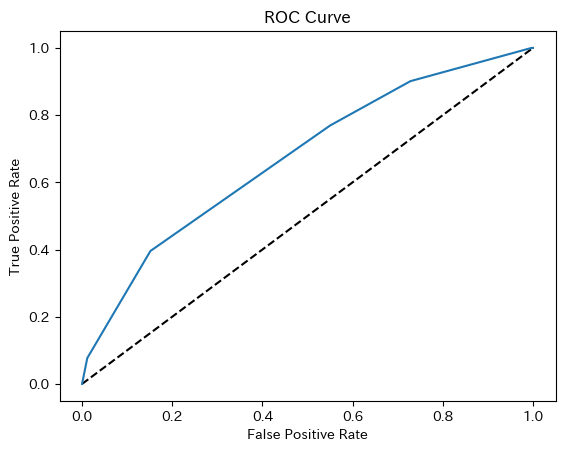

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
test_age = test_x['Age'].apply(process_age)
test_age_filled = test_age.fillna(test_age.median())

In [ ]:
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß‰∫àÊ∏¨„ÇíË°å„ÅÜ
y_pred = predict_probability_by_age(test_age_filled)

# Á≤æÂ∫¶„ÅÆË©ï‰æ°
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´„ÅØ y_test „ÅØÂ≠òÂú®„Åó„Å™„ÅÑ„Åü„ÇÅ„ÄÅ‰∫àÊ∏¨ÁµêÊûú„Å†„Åë„ÇíÂá∫Âäõ„Åó„Åæ„Åô
print("Predictions:")
print(y_pred.value_counts())

Predictions:
Age
0.146592    1356
0.081944     861
0.270161     649
0.085288     568
0.500000      46
0.000000       9
Name: count, dtype: int64


In [ ]:
# submit_sample.csv„ÇíË™≠„ÅøËæº„Åø„Åæ„Åô„ÄÇ
submit = pd.read_csv(data_dir + "sample_submit.csv", header=None)
submit.head()

0         1
0  3489  0.119451
1  3490  0.343575
2  3491  0.119451
3  3492  0.119451
4  3493  0.119451

In [ ]:
submit[1] = y_pred
submit.head()

0         1
0  3489  0.081944
1  3490  0.146592
2  3491  0.270161
3  3492  0.270161
4  3493  0.081944

### Age x TypeofContact

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ê¨†ÊêçÂÄ§„Çí‰∏≠Â§ÆÂÄ§„ÅßË£úÂÆå
train_age_filled = train_age.fillna(train_age.median())
train_contact_filled = train_x['TypeofContact'].fillna(train_x['TypeofContact'].mode()[0])

# „Éá„Éº„Çø„ÅÆÂàÜÂâ≤
X_train, X_valid, y_train, y_valid = train_test_split(
    pd.DataFrame({'Age': train_age_filled, 'TypeofContact': train_contact_filled}),
    train_y,
    test_size=0.2,
    random_state=42
)

# Âπ¥ÈΩ¢„Éì„É≥„Å´ÂàÜ„Åë„Çã
train_age_bins = pd.cut(X_train['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80])

# Âπ¥ÈΩ¢„Éì„É≥„Å®TypeofContact„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åî„Å®„Å´ÊàêÁ¥ÑÁéá„ÇíË®àÁÆó
grouped = y_train.groupby([train_age_bins, X_train['TypeofContact']]).mean()

# Âπ¥ÈΩ¢„Éì„É≥„Å®TypeofContact„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åî„Å®„Å´ÊàêÁ¥Ñ„ÉªÈùûÊàêÁ¥Ñ„ÅÆ„Ç´„Ç¶„É≥„Éà„ÇíË®àÁÆó
crosstab_data = pd.crosstab([train_age_bins, X_train['TypeofContact']], y_train)

<ipython-input-178-10f35a83ee1c>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = y_train.groupby([train_age_bins, X_train['TypeofContact']]).mean()


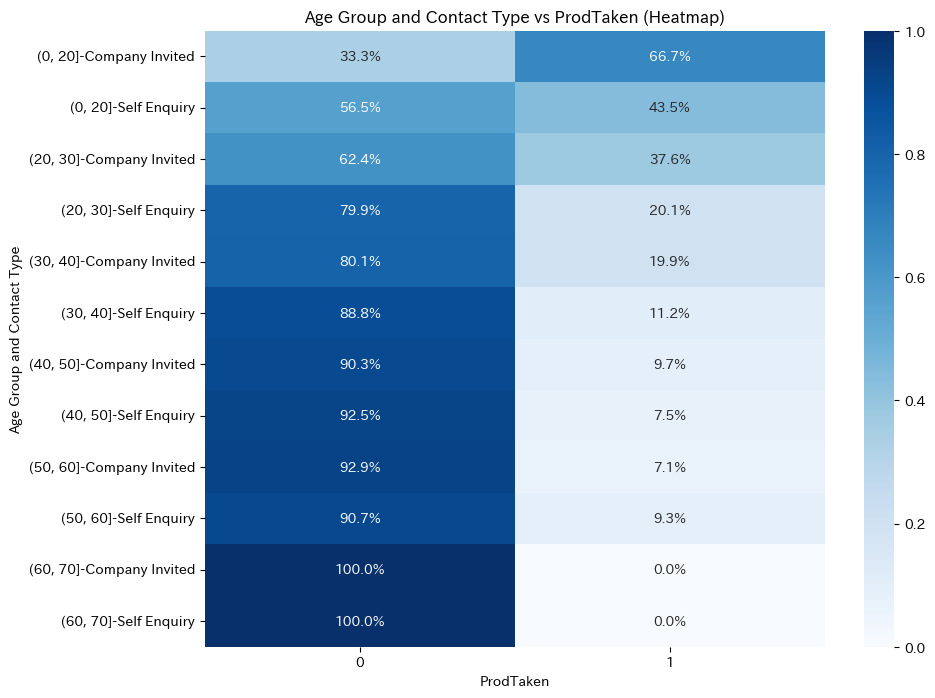

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# „Éí„Éº„Éà„Éû„ÉÉ„ÉóÁî®„Å´„Éá„Éº„Çø„ÇíÊï¥ÂΩ¢
# crosstab_data„ÇíÂâ≤Âêà„Å´Â§âÊèõ
crosstab_percentage = crosstab_data.div(crosstab_data.sum(axis=1), axis=0)

# „Éí„Éº„Éà„Éû„ÉÉ„Éó„ÇíÊèèÁîª
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_percentage, annot=True, fmt=".1%", cmap="Blues", cbar=True)

# „Ç∞„É©„Éï„ÅÆ„Çø„Ç§„Éà„É´„Å®„É©„Éô„É´„ÅÆË®≠ÂÆö
plt.title('Age Group and Contact Type vs ProdTaken (Heatmap)')
plt.xlabel('ProdTaken')
plt.ylabel('Age Group and Contact Type')

# „Ç∞„É©„Éï„ÅÆË°®Á§∫
plt.show()

In [ ]:
crosstab_percentage

ProdTaken                        0         1
Age      TypeofContact                      
(0, 20]  Company Invited  0.333333  0.666667
         Self Enquiry     0.565217  0.434783
(20, 30] Company Invited  0.624365  0.375635
         Self Enquiry     0.799331  0.200669
(30, 40] Company Invited  0.801402  0.198598
         Self Enquiry     0.888025  0.111975
(40, 50] Company Invited  0.903361  0.096639
         Self Enquiry     0.925311  0.074689
(50, 60] Company Invited  0.928571  0.071429
         Self Enquiry     0.906977  0.093023
(60, 70] Company Invited  1.000000  0.000000
         Self Enquiry     1.000000  0.000000

In [ ]:
# ‰∫àÊ∏¨Èñ¢Êï∞„ÅÆÊîπËâØÁâàÔºàDataFrameÂÖ®‰Ωì„ÇíÂèó„ÅëÂèñ„ÇãÔºâ
def predict_probability_by_X(df):
    # ÂêÑË°å„Å´ÂØæ„Åó„Å¶Âπ¥ÈΩ¢„Éì„É≥„Å®ÈÄ£Áµ°ÊñπÊ≥ï„Å´Âü∫„Å•„ÅÑ„Å¶ÊàêÁ¥ÑÁéá„Çí‰∫àÊ∏¨
    probabilities = []
    for _, row in df.iterrows():
        age = row['Age']
        contact = row['TypeofContact']

        # Âπ¥ÈΩ¢„Å´Âü∫„Å•„ÅÑ„Å¶„Éì„É≥„ÇíÁâπÂÆö
        age_bin = pd.cut([age], bins=[0, 20, 30, 40, 50, 60, 70, 80])[0]

        # Âπ¥ÈΩ¢„Éì„É≥„Å®ÈÄ£Áµ°ÊñπÊ≥ï„Å´Âü∫„Å•„ÅÑ„Å¶ÊàêÁ¥ÑÁéá„Çí‰∫àÊ∏¨
        prob = grouped.get((age_bin, contact), 0)  # Ë©≤ÂΩì„Åô„ÇãÁµÑ„ÅøÂêà„Çè„Åõ„Åå„Å™„ÅÑÂ†¥Âêà„ÄÅÁ¢∫Áéá„ÅØ0„Å®„Åô„Çã
        probabilities.append(prob)

    return pd.Series(probabilities, index=df.index)

In [ ]:
# Ê§úË®º„Éá„Éº„Çø„Åß‰∫àÊ∏¨Á¢∫Áéá„ÇíË®àÁÆó
y_prob = predict_probability_by_X(X_valid)

# AUC„ÅÆË®àÁÆó
auc_score = roc_auc_score(y_valid, y_prob)
print(f"AUC: {auc_score:.2f}")

AUC: 0.65


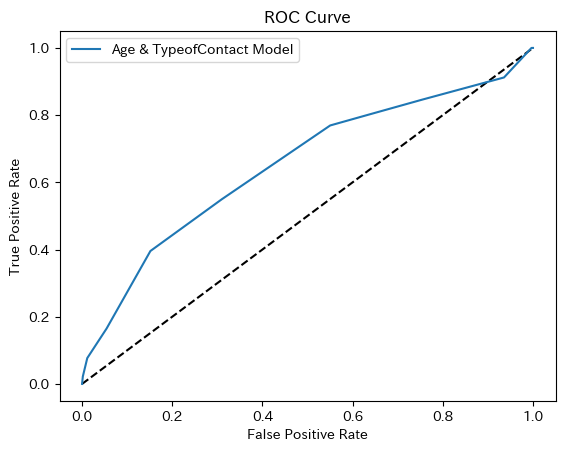

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROCÊõ≤Á∑ö„ÅÆ„Éá„Éº„Çø„ÇíÂèñÂæó
fpr, tpr, thresholds = roc_curve(y_valid, y_prob)

# ROCÊõ≤Á∑ö„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Age & TypeofContact Model')  # „É©„Éô„É´„Çí„ÄåAge & TypeofContact Model„Äç„Å´Â§âÊõ¥
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')  # Âá°‰æã„ÇíËøΩÂä†
plt.show()

In [ ]:
# Age„ÅÆÂá¶ÁêÜ
test_age = test_x['Age'].apply(process_age)
test_age_filled = test_age.fillna(test_age.median())

# TypeofContact„ÅÆÂá¶ÁêÜ
test_contact_filled = test_x['TypeofContact'].fillna(train_contact_filled.mode()[0])  # „É¢„Éº„Éâ„ÅßË£úÂÆå

In [ ]:
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß‰∫àÊ∏¨„ÇíË°å„ÅÜ
test_data = pd.DataFrame({'Age': test_age_filled, 'TypeofContact': test_contact_filled})
y_pred = predict_probability_by_X(test_data)

# Á≤æÂ∫¶„ÅÆË©ï‰æ°Ôºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´„ÅØ y_test „ÅØÂ≠òÂú®„Åó„Å™„ÅÑ„Åü„ÇÅ„ÄÅ‰∫àÊ∏¨ÁµêÊûú„Å†„Åë„ÇíÂá∫Âäõ„Åó„Åæ„ÅôÔºâ
print("Predictions:")
print(y_pred.value_counts())

Predictions:
0.111975    829
0.074689    589
0.198598    527
0.200669    418
0.093023    390
0.096639    272
0.375635    231
0.071429    178
0.434783     31
0.666667     15
0.000000      9
Name: count, dtype: int64


In [ ]:
# submit_sample.csv„ÇíË™≠„ÅøËæº„Åø„Åæ„Åô„ÄÇ
submit = pd.read_csv(data_dir + "sample_submit.csv", header=None)
submit.head()

0         1
0  3489  0.119451
1  3490  0.343575
2  3491  0.119451
3  3492  0.119451
4  3493  0.119451

In [ ]:
# ÊèêÂá∫Áî®„Éá„Éº„Çø„Éï„É¨„Éº„É†„Å´‰∫àÊ∏¨ÁµêÊûú„Çí‰ª£ÂÖ•
submit[1] = y_pred
submit.head()

0         1
0  3489  0.074689
1  3490  0.111975
2  3491  0.200669
3  3492  0.375635
4  3493  0.096639

In [ ]:
# CSV„Éï„Ç°„Ç§„É´„Å´Êõ∏„ÅçÂá∫„Åó
submit.to_csv('submission_age_contact.csv', index=False, header=False)

### Age x TypeofContact x Tier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Ê¨†ÊêçÂÄ§„ÅÆË£úÂÆå
train_age_filled = train_age.fillna(train_age.median())
train_contact_filled = train_x['TypeofContact'].fillna(train_x['TypeofContact'].mode()[0])
train_citytier_filled = train_x['CityTier'].fillna(train_x['CityTier'].mode()[0])

# „Éá„Éº„Çø„ÅÆÂàÜÂâ≤
X_train, X_valid, y_train, y_valid = train_test_split(
    pd.DataFrame({
        'Age': train_age_filled,
        'TypeofContact': train_contact_filled,
        'CityTier': train_citytier_filled
    }),
    train_y,
    test_size=0.2,
    random_state=42
)

# Âπ¥ÈΩ¢„Çí„Éì„É≥„Å´ÂàÜ„Åë„Çã
train_age_bins = pd.cut(X_train['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80])

# Âπ¥ÈΩ¢„Éì„É≥„ÄÅTypeofContact„ÄÅCityTier„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åî„Å®„Å´ÊàêÁ¥ÑÁéá„ÇíË®àÁÆó
grouped = y_train.groupby([train_age_bins, X_train['TypeofContact'], X_train['CityTier']]).mean()


<ipython-input-333-2ee50d522c3f>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = y_train.groupby([train_age_bins, X_train['TypeofContact'], X_train['CityTier']]).mean()


In [ ]:
# Âπ¥ÈΩ¢„Éì„É≥„Å®TypeofContact„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åî„Å®„Å´ÊàêÁ¥Ñ„ÉªÈùûÊàêÁ¥Ñ„ÅÆ„Ç´„Ç¶„É≥„Éà„ÇíË®àÁÆó
crosstab_data = pd.crosstab([train_age_bins, X_train['TypeofContact'], X_train['CityTier']], y_train)

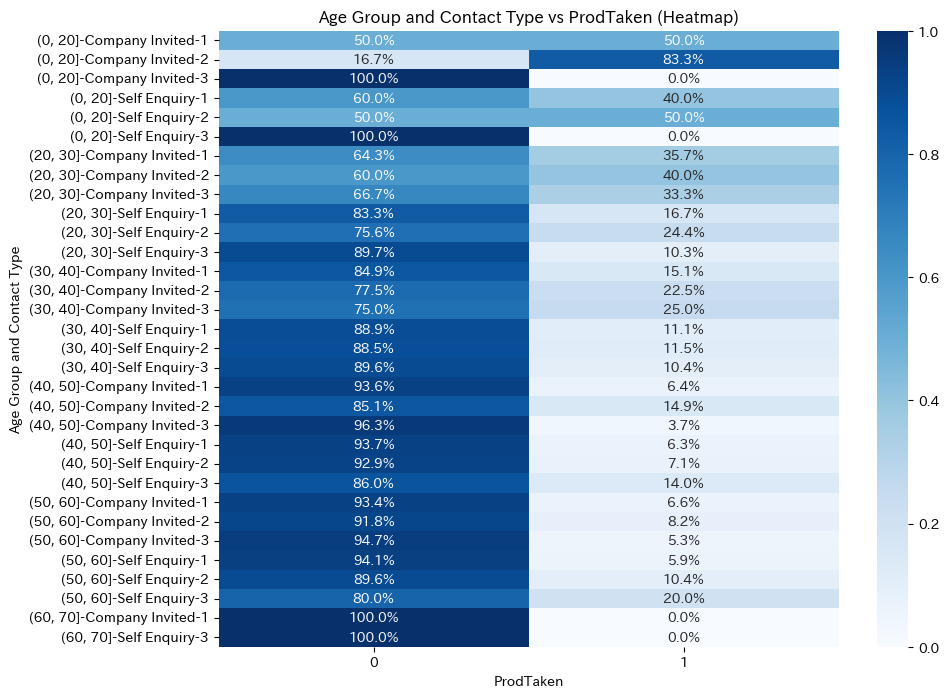

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# „Éí„Éº„Éà„Éû„ÉÉ„ÉóÁî®„Å´„Éá„Éº„Çø„ÇíÊï¥ÂΩ¢
# crosstab_data„ÇíÂâ≤Âêà„Å´Â§âÊèõ
crosstab_percentage = crosstab_data.div(crosstab_data.sum(axis=1), axis=0)

# „Éí„Éº„Éà„Éû„ÉÉ„Éó„ÇíÊèèÁîª
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_percentage, annot=True, fmt=".1%", cmap="Blues", cbar=True)

# „Ç∞„É©„Éï„ÅÆ„Çø„Ç§„Éà„É´„Å®„É©„Éô„É´„ÅÆË®≠ÂÆö
plt.title('Age Group and Contact Type vs ProdTaken (Heatmap)')
plt.xlabel('ProdTaken')
plt.ylabel('Age Group and Contact Type')

# „Ç∞„É©„Éï„ÅÆË°®Á§∫
plt.show()

In [ ]:
crosstab_percentage

ProdTaken                                 0         1
Age      TypeofContact   CityTier                    
(0, 20]  Company Invited 1         0.500000  0.500000
                         2         0.166667  0.833333
                         3         1.000000  0.000000
         Self Enquiry    1         0.600000  0.400000
                         2         0.500000  0.500000
                         3         1.000000  0.000000
(20, 30] Company Invited 1         0.642857  0.357143
                         2         0.600000  0.400000
                         3         0.666667  0.333333
         Self Enquiry    1         0.833333  0.166667
                         2         0.756410  0.243590
                         3         0.896552  0.103448
(30, 40] Company Invited 1         0.848837  0.151163
                         2         0.775000  0.225000
                         3         0.750000  0.250000
         Self Enquiry    1         0.888889  0.111111
                         2         0.885017  0.114983
                         3         0.896104  0.103896
(40, 50] Company Invited 1         0.936364  0.063636
                         2         0.851485  0.148515
                         3         0.962963  0.037037
         Self Enquiry    1         0.936937  0.063063
                         2         0.928571  0.071429
                         3         0.860000  0.140000
(50, 60] Company Invited 1         0.934211  0.065789
                         2         0.917808  0.082192
                         3         0.947368  0.052632
         Self Enquiry    1         0.941176  0.058824
                         2         0.896296  0.103704
                         3         0.800000  0.200000
(60, 70] Company Invited 1         1.000000  0.000000
         Self Enquiry    3         1.000000  0.000000

In [ ]:
crosstab_data

ProdTaken                            0   1
Age      TypeofContact   CityTier         
(0, 20]  Company Invited 1           1   1
                         2           1   5
                         3           1   0
         Self Enquiry    1           6   4
                         2           6   6
                         3           1   0
(20, 30] Company Invited 1          36  20
                         2          63  42
                         3          24  12
         Self Enquiry    1          95  19
                         2         118  38
                         3          26   3
(30, 40] Company Invited 1         146  26
                         2         155  45
                         3          42  14
         Self Enquiry    1         248  31
                         2         254  33
                         3          69   8
(40, 50] Company Invited 1         103   7
                         2          86  15
                         3          26   1
         Self Enquiry    1         208  14
                         2         195  15
                         3          43   7
(50, 60] Company Invited 1          71   5
                         2          67   6
                         3          18   1
         Self Enquiry    1         128   8
                         2         121  14
                         3          24   6
(60, 70] Company Invited 1           1   0
         Self Enquiry    3           2   0

In [ ]:
def predict_probability_by_age_contact_tier(df):
    # ÂêÑË°å„Å´ÂØæ„Åó„Å¶Âπ¥ÈΩ¢„Éì„É≥„ÄÅÈÄ£Áµ°ÊñπÊ≥ï„ÄÅÈÉΩÂ∏ÇÂ±§„Å´Âü∫„Å•„ÅÑ„Å¶ÊàêÁ¥ÑÁéá„Çí‰∫àÊ∏¨
    probabilities = []
    for _, row in df.iterrows():
        age = row['Age']
        contact = row['TypeofContact']
        city_tier = row['CityTier']

        # Âπ¥ÈΩ¢„Å´Âü∫„Å•„ÅÑ„Å¶„Éì„É≥„ÇíÁâπÂÆö
        age_bin = pd.cut([age], bins=[0, 20, 30, 40, 50, 60, 70, 80])[0]

        # Âπ¥ÈΩ¢„Éì„É≥„ÄÅTypeofContact„ÄÅCityTier„Å´Âü∫„Å•„ÅÑ„Å¶ÊàêÁ¥ÑÁéá„Çí‰∫àÊ∏¨
        prob = grouped.get((age_bin, contact, city_tier), 0)  # Ë©≤ÂΩì„Åô„ÇãÁµÑ„ÅøÂêà„Çè„Åõ„Åå„Å™„ÅÑÂ†¥Âêà„ÄÅÁ¢∫Áéá„ÅØ0„Å®„Åô„Çã
        probabilities.append(prob)

    return pd.Series(probabilities, index=df.index)

In [ ]:
# ‰∫àÊ∏¨„ÅÆÂÆüË°å
y_prob = predict_probability_by_age_contact_tier(X_valid)

# AUC„ÅÆË®àÁÆó
auc_score = roc_auc_score(y_valid, y_prob)
print(f"AUC: {auc_score:.2f}")

AUC: 0.65


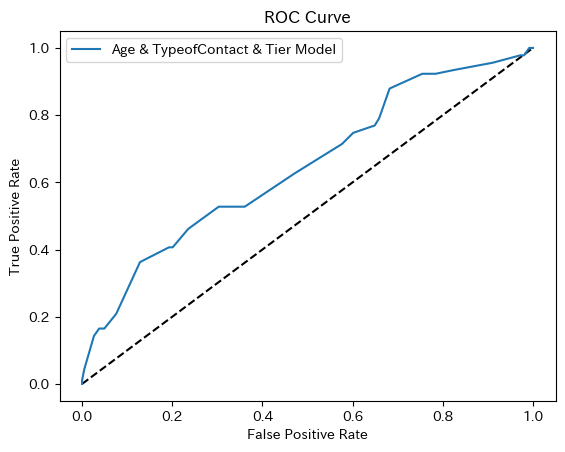

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROCÊõ≤Á∑ö„ÅÆ„Éá„Éº„Çø„ÇíÂèñÂæó
fpr, tpr, thresholds = roc_curve(y_valid, y_prob)

# ROCÊõ≤Á∑ö„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Age & TypeofContact & Tier Model')  # „É©„Éô„É´„Çí„ÄåAge & TypeofContact & Tier Model„Äç„Å´Â§âÊõ¥
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')  # Âá°‰æã„ÇíËøΩÂä†
plt.show()

In [ ]:
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆÊ∫ñÂÇô
test_age = test_x['Age'].apply(process_age)
test_age_filled = test_age.fillna(test_age.median())
test_contact_filled = test_x['TypeofContact'].fillna(test_x['TypeofContact'].mode()[0])
test_citytier_filled = test_x['CityTier'].fillna(test_x['CityTier'].mode()[0])

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß‰∫àÊ∏¨„ÇíË°å„ÅÜ
test_data = pd.DataFrame({
    'Age': test_age_filled,
    'TypeofContact': test_contact_filled,
    'CityTier': test_citytier_filled
})
y_pred =  predict_probability_by_age_contact_tier(test_data)

# Á≤æÂ∫¶„ÅÆË©ï‰æ°Ôºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´„ÅØ y_test „ÅØÂ≠òÂú®„Åó„Å™„ÅÑ„Åü„ÇÅ„ÄÅ‰∫àÊ∏¨ÁµêÊûú„Å†„Åë„ÇíÂá∫Âäõ„Åó„Åæ„ÅôÔºâ
print("Predictions:")
print(y_pred.value_counts())

Predictions:
0.111111    381
0.114983    364
0.063063    281
0.225000    246
0.071429    243
0.151163    214
0.243590    199
0.058824    184
0.103704    164
0.166667    161
0.400000    132
0.148515    120
0.063636    118
0.065789     86
0.103896     84
0.357143     74
0.082192     71
0.250000     67
0.140000     65
0.103448     58
0.200000     42
0.037037     34
0.333333     34
0.500000     22
0.052632     21
0.833333     11
0.000000      5
Name: count, dtype: int64


In [ ]:
# submit_sample.csv„ÇíË™≠„ÅøËæº„Åø„Åæ„Åô„ÄÇ
submit = pd.read_csv(data_dir + "sample_submit.csv", header=None)
submit.head()

0         1
0  3489  0.119451
1  3490  0.343575
2  3491  0.119451
3  3492  0.119451
4  3493  0.119451

In [ ]:
# ÊèêÂá∫Áî®„Éá„Éº„Çø„Éï„É¨„Éº„É†„Å´‰∫àÊ∏¨ÁµêÊûú„Çí‰ª£ÂÖ•
submit[1] = y_pred
submit.head()

0         1
0  3489  0.071429
1  3490  0.114983
2  3491  0.166667
3  3492  0.400000
4  3493  0.063636

In [ ]:
# CSV„Éï„Ç°„Ç§„É´„Å´Êõ∏„ÅçÂá∫„Åó
submit.to_csv('submission_age_contact_tier.csv', index=False, header=False)

### Age x TypeofContact x Tier x ...

‰ª•‰∏ã„ÄÅÂêå„Åò„Çà„ÅÜ„Å´‰ªò„ÅëË∂≥„Åó„Å¶„ÅÑ„Åè

## ÂøúÁî®ÁöÑ„Å™ÂàÜÊûê

### „ÇØ„É©„Çπ„ÇøÂàÜÊûê

In [ ]:
#ÂàÜÊûêÁî®„ÅÆÂâçÂá¶ÁêÜÈñ¢Êï∞
def preprocess_data4cluster(df):
    df['Age'] = df['Age'].apply(process_age)
    # df['TypeofContact'] = df['TypeofContact'].apply(TypeofContact_to_dummy)
    # CityTier
    df['DurationOfPitch'] = df['DurationOfPitch'].apply(convert_to_minutes)
    df['Occupation'] = df['Occupation'].apply(standardize_str)
    df['Gender'] = df['Gender'].apply(Gender_dealing)
    df['NumberOfFollowups'] = df['NumberOfFollowups'].apply(NumberOfFollowups_dealing)
    df['ProductPitched'] = df['ProductPitched'].apply(standardize_str)
    df['NumberOfTrips'] = df['NumberOfTrips'].apply(NumberOfTrips_dealing)
    df['Designation'] = df['Designation'].apply(standardize_str)
    df['MonthlyIncome'] = df['MonthlyIncome'].apply(MonthlyIncome_dealing)

    customer_info_processed = df['customer_info'].apply(customer_info_dealing).str.split(',', expand=True)
    df['married'] = customer_info_processed[0]
    df['car_possession'] = customer_info_processed[1].apply(car_possesion_dealing)
    df['offspring'] = customer_info_processed[2].apply(offspring_dealing)
    df['offspring_identified'] = customer_info_processed[2].apply(offspring_identified_dealing)
    df.drop('customer_info', axis=1, inplace=True)

    # Êï∞ÂÄ§„Éá„Éº„Çø„ÅÆÊ¨†ÊêçÂÄ§„ÇíÂπ≥ÂùáÂÄ§„ÅßË£úÂÆå
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col].fillna(df[col].mean(), inplace=True)

    # „Ç´„ÉÜ„Ç¥„É™„Éá„Éº„Çø„ÅÆÊ¨†ÊêçÂÄ§„ÇíÊúÄÈ†ªÂÄ§„ÅßË£úÂÆå
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # One-Hot Encoding
    df = pd.get_dummies(df, columns=[
        'TypeofContact',
        'Occupation',
        'Gender',
        'ProductPitched',
        'Designation',
        'married',
        'car_possession'
    ], drop_first=True)

    return df

In [ ]:
train_x = train.drop(['id', 'ProdTaken'], axis=1)
train_y = train['ProdTaken']
test_x = test.drop(['id'], axis=1)

In [ ]:
# „Éá„Éº„Çø„ÅÆÁµêÂêà
full_data = pd.concat([train_x, test_x], axis=0)

# ÂâçÂá¶ÁêÜ
full_processed4cluster = preprocess_data4cluster(full_data)

NameError: name 'process_age' is not defined

In [ ]:
full_processed4cluster

Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0     50.000000         2             15.0                     1.0   
1     56.000000         1             14.0                     1.0   
2     39.309654         1             10.0                     1.0   
3     37.000000         2             18.0                     1.0   
4     48.000000         3             17.0                     1.0   
...         ...       ...              ...                     ...   
3484  41.000000         1             14.0                     1.0   
3485  44.000000         1             35.0                     3.0   
3486  24.000000         2             21.0                     2.0   
3487  25.000000         1              9.0                     2.0   
3488  44.000000         1              8.0                     4.0   

      NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
0                   4.0                    3.0            5.0         1   
1                   4.0                    3.0            2.0         1   
2                   3.0                    3.0            4.0         0   
3                   3.0                    4.0            1.0         0   
4                   3.0                    4.0            4.0         0   
...                 ...                    ...            ...       ...   
3484                3.0                    3.0            2.0         0   
3485                5.0                    3.0            3.0         0   
3486                3.0                    3.0            2.0         0   
3487                3.0                    3.0            2.0         0   
3488                4.0                    3.0            5.0         0   

      PitchSatisfactionScore  MonthlyIncome  ...  ProductPitched_standard  \
0                          4       253905.0  ...                    False   
1                          4       404475.0  ...                     True   
2                          4       278145.0  ...                    False   
3                          5       326805.0  ...                     True   
4                          4       258435.0  ...                    False   
...                      ...            ...  ...                      ...   
3484                       4       261840.0  ...                    False   
3485                       3       349770.0  ...                    False   
3486                       3       270000.0  ...                    False   
3487                       3       272430.0  ...                    False   
3488                       1       411795.0  ...                    False   

      ProductPitched_superdeluxe  Designation_executive  Designation_manager  \
0                          False                   True                False   
1                          False                  False                False   
2                          False                   True                False   
3                          False                  False                False   
4                          False                   True                False   
...                          ...                    ...                  ...   
3484                       False                   True                False   
3485                       False                  False                 True   
3486                       False                   True                False   
3487                       False                   True                False   
3488                       False                  False                 True   

      Designation_seniormanager  Designation_vp  married_Áã¨Ë∫´  married_ÁµêÂ©öÊ∏à„Åø  \
0                         False           False       False         False   
1                          True           False       False         False   
2                         False           False       False          True   
3                          True           False       False     

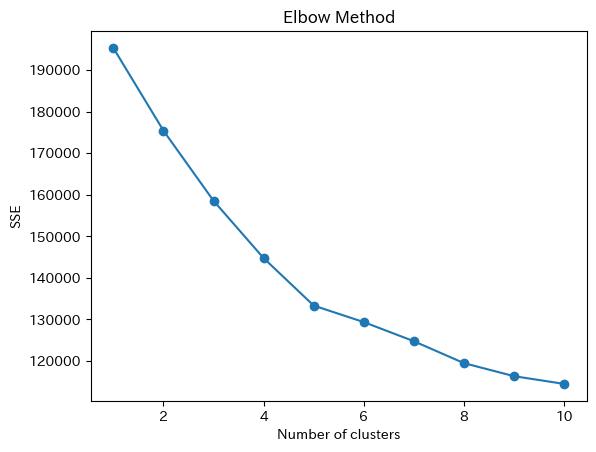

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Êï∞ÂÄ§„Éá„Éº„Çø„ÅÆÊ®ôÊ∫ñÂåñ
features_scaled = StandardScaler().fit_transform(full_processed4cluster)

# „Ç®„É´„Éú„ÉºÊ≥ï„Åß„ÇØ„É©„Çπ„ÇøÊï∞„ÇíÊ±∫ÂÆö
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# „Ç®„É´„Éú„ÉºÊ≥ï„ÅÆ„Ç∞„É©„Éï„Çí„Éó„É≠„ÉÉ„Éà
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# ÊúÄÈÅ©„Å™„ÇØ„É©„Çπ„ÇøÊï∞„ÅßKMeans„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„ÇíÂÆüË°å
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # n_init „ÇíÊòéÁ§∫ÁöÑ„Å´Ë®≠ÂÆö
kmeans.fit(features_scaled)

# „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁµêÊûú„ÇíËøΩÂä†
full_processed4cluster['Cluster'] = kmeans.labels_

# „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁµêÊûú„ÇíÁ¢∫Ë™ç
print(full_processed4cluster['Cluster'].value_counts())

Cluster
2    2325
1    2096
3    1624
0     641
4     292
Name: count, dtype: int64


In [ ]:
full_processed4cluster.shape

(6978, 29)

In [ ]:
import pandas as pd

# „ÇØ„É©„Çπ„Çø„Åî„Å®„ÅÆ„Éá„Éº„ÇøÊï∞„ÇíÁ¢∫Ë™ç
cluster_counts = full_processed4cluster['Cluster'].value_counts()
print("Cluster counts:\n", cluster_counts)

# Êï∞ÂÄ§„Éá„Éº„Çø„ÅÆ„ÇØ„É©„Çπ„Çø„Åî„Å®„ÅÆÂπ≥ÂùáÂÄ§„ÇíË®àÁÆó
numeric_columns = full_processed4cluster.select_dtypes(include=['float64', 'int64']).columns
cluster_means = full_processed4cluster.groupby('Cluster')[numeric_columns].mean()
print("\nCluster means for numeric columns:\n")
display(cluster_means)

# „Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„ÅÆ„ÇØ„É©„Çπ„Çø„Åî„Å®„ÅÆ„ÇØ„É≠„ÇπÈõÜË®à„ÇíË°®Á§∫
categorical_columns = full_processed4cluster.select_dtypes(include=['object', 'category', 'bool']).columns
for column in categorical_columns:
    cluster_crosstab = pd.crosstab(full_processed4cluster['Cluster'], full_processed4cluster[column])
    print(f"\nCluster crosstab for {column}:\n")
    display(cluster_crosstab)

Cluster counts:
 Cluster
2    2325
1    2096
3    1624
0     641
4     292
Name: count, dtype: int64

Cluster means for numeric columns:



Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
Cluster                                                                 
0        48.468502  1.631825        15.503795                2.271451   
1        38.649347  1.823950        17.329334                2.463740   
2        34.254109  1.524731        13.338860                2.399140   
3        42.284673  1.810345        12.319581                2.355296   
4        47.651745  1.500000        12.556392                2.506849   

         NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
Cluster                                                                      
0                 3.523163               3.594384       3.507360  0.107644   
1                 3.679227               3.292462       3.316515  0.075382   
2                 3.714146               3.378495       3.206808  0.103226   
3                 3.649015               3.647167       2.864427  0.116995   
4                 3.777397               3.414384       3.674569  0.113014   

         PitchSatisfactionScore  MonthlyIncome  offspring  \
Cluster                                                     
0                      2.319813  465792.748378   0.893916   
1                      2.550573  338868.424940   1.080630   
2                      2.605161  300937.081376   0.956129   
3                      2.323276  390070.495690   0.975369   
4                      2.845890  490042.825342   1.027397   

         offspring_identified  
Cluster                        
0                    0.053042  
1                    0.002385  
2                    0.002581  
3                    0.000000  
4                    0.099315


Cluster crosstab for TypeofContact_Self Enquiry:



TypeofContact_Self Enquiry  False  True 
Cluster                                 
0                             222    419
1                             752   1344
2                             834   1491
3                             663    961
4                              45    247


Cluster crosstab for Occupation_salaried:



Occupation_salaried  False  True 
Cluster                          
0                      333    308
1                     1137    959
2                     1777    548
3                      797    827
4                      133    159


Cluster crosstab for Occupation_smallbusiness:



Occupation_smallbusiness  False  True 
Cluster                               
0                           347    294
1                          1061   1035
2                           900   1425
3                          1035    589
4                           179    113


Cluster crosstab for Gender_MALE:



Gender_MALE  False  True 
Cluster                  
0              201    440
1              873   1223
2              904   1421
3              731    893
4               51    241


Cluster crosstab for ProductPitched_deluxe:



ProductPitched_deluxe  False  True 
Cluster                            
0                        641      0
1                         30   2066
2                       2314     11
3                       1614     10
4                        288      4


Cluster crosstab for ProductPitched_king:



ProductPitched_king  False  True 
Cluster                          
0                      641      0
1                     2096      0
2                     2321      4
3                     1623      1
4                       11    281


Cluster crosstab for ProductPitched_standard:



ProductPitched_standard  False  True 
Cluster                              
0                          641      0
1                         2089      7
2                         2308     17
3                           38   1586
4                          288      4


Cluster crosstab for ProductPitched_superdeluxe:



ProductPitched_superdeluxe  False  True 
Cluster                                 
0                               3    638
1                            2096      0
2                            2323      2
3                            1624      0
4                             292      0


Cluster crosstab for Designation_executive:



Designation_executive  False  True 
Cluster                            
0                        630     11
1                       2095      1
2                         13   2312
3                       1623      1
4                        287      5


Cluster crosstab for Designation_manager:



Designation_manager  False  True 
Cluster                          
0                      624     17
1                       19   2077
2                     2322      3
3                     1606     18
4                      290      2


Cluster crosstab for Designation_seniormanager:



Designation_seniormanager  False  True 
Cluster                                
0                            627     14
1                           2085     11
2                           2323      2
3                             35   1589
4                            276     16


Cluster crosstab for Designation_vp:



Designation_vp  False  True 
Cluster                     
0                 632      9
1                2096      0
2                2325      0
3                1622      2
4                  39    253


Cluster crosstab for married_Áã¨Ë∫´:



married_Áã¨Ë∫´  False  True 
Cluster                 
0             477    164
1            1858    238
2            1599    726
3            1486    138
4             249     43


Cluster crosstab for married_ÁµêÂ©öÊ∏à„Åø:



married_ÁµêÂ©öÊ∏à„Åø  False  True 
Cluster                   
0               418    223
1              1216    880
2              1506    819
3               900    724
4                92    200


Cluster crosstab for married_Èõ¢Â©öÊ∏à„Åø:



married_Èõ¢Â©öÊ∏à„Åø  False  True 
Cluster                   
0               412    229
1              1622    474
2              1688    637
3              1319    305
4               249     43


Cluster crosstab for car_possession_Ëªä„Å™„Åó:



car_possession_Ëªä„Å™„Åó  False  True 
Cluster                         
0                     199    442
1                    1354    742
2                    1252   1073
3                     699    925
4                     115    177



---

**Cluster 0: È´òÂèéÂÖ•„ÉªÁÆ°ÁêÜËÅ∑„ÉªVP„ÇØ„É©„Çπ„Çø**  
ÁâπÊÄß: Âπ¥ÈΩ¢„ÅåÈ´ò„Åè„ÄÅÂèéÂÖ•„ÅåÊúÄ„ÇÇÈ´ò„ÅÑ„ÄÇ‰∏ª„Å´VP„Å™„Å©„ÅÆÈ´ò‰ΩçËÅ∑„ÄÇÁî∑ÊÄß„ÅåÂ§ö„Åè„ÄÅsuperdeluxe Ë£ΩÂìÅ„ÇíÂ•Ω„ÇÄ„ÄÇËªä„Å™„Åó„ÅÆÂâ≤Âêà„ÅåÈ´ò„Åè„ÄÅÁã¨Ë∫´Áéá„ÇÑÈõ¢Â©öÊ∏à„ÅøÁéá„ÇÇÈ´ò„ÅÑ„ÄÇ

---

**Cluster 1: È´òÂèéÂÖ•„Éª„Ç∑„Éã„Ç¢„Éû„Éç„Éº„Ç∏„É£„Éº„ÇØ„É©„Çπ„Çø**  
ÁâπÊÄß: Âπ¥ÈΩ¢„ÅåÈ´ò„Åè„ÄÅ„Ç∑„Éã„Ç¢„Éû„Éç„Éº„Ç∏„É£„Éº„ÇÑsmall business„Å´Âæì‰∫ã„Åô„Çã‰∫∫„ÅåÂ§ö„ÅÑ„ÄÇdeluxe Ë£ΩÂìÅ„ÇíÈÅ∏„Å∂ÂÇæÂêë„Åå„ÅÇ„Çä„ÄÅËªä„Å™„Åó„ÅÆÂâ≤Âêà„ÅåÊØîËºÉÁöÑÈ´ò„ÅÑ„ÄÇ

---

**Cluster 2: Ëã•Âπ¥Â±§„Éª‰ΩéÂèéÂÖ•„Éª„Çµ„É©„É™„Éº„Éû„É≥„ÇØ„É©„Çπ„Çø**  
ÁâπÊÄß: Ëã•Âπ¥Â±§„ÅßÂèéÂÖ•„Åå‰Ωé„Åè„ÄÅ‰∏ª„Å´„Çµ„É©„É™„Éº„Éû„É≥„ÄÇstandard Ë£ΩÂìÅ„ÇíÈÅ∏Êäû„Åô„ÇãÂÇæÂêë„ÅåÂº∑„ÅÑ„ÄÇËªä„Å™„ÅóÁéá„ÅåÈ´ò„ÅÑ„Åå„ÄÅÂÖ®‰ΩìÁöÑ„Å´ÂèéÂÖ•„ÅØ‰Ωé„ÇÅ„ÄÇ

---

**Cluster 3: ‰∏≠ÈñìÂ±§„Éª„Çµ„É©„É™„Éº„Éû„É≥„Éª„Çπ„Çø„É≥„ÉÄ„Éº„Éâ„ÇØ„É©„Çπ„Çø**  
ÁâπÊÄß: Âπ¥ÈΩ¢„Å®ÂèéÂÖ•„Åå‰∏≠ÈñìÂ±§„ÄÇstandard Ë£ΩÂìÅ„ÇíÂ•Ω„Åø„ÄÅ„Çµ„É©„É™„Éº„Éû„É≥„ÅåÂ§ö„ÅÑ„ÄÇËªä„Å™„Åó„ÅÆÂâ≤Âêà„ÇÇ„ÇÑ„ÇÑÈ´ò„Åè„ÄÅÁµêÂ©öÊ∏à„Åø„ÅÆÂâ≤Âêà„ÅåÊØîËºÉÁöÑÈ´ò„ÅÑ„ÄÇ

---

**Cluster 4: ‰∏≠ÈñìÂ±§„ÉªÂ∞èË¶èÊ®°„Éì„Ç∏„Éç„Çπ„ÉªËªä„Å™„Åó„ÇØ„É©„Çπ„Çø**  
ÁâπÊÄß: Âπ¥ÈΩ¢„Åå„ÇÑ„ÇÑÈ´ò„Åè„ÄÅÂ∞èË¶èÊ®°„Éì„Ç∏„Éç„Çπ„Å´Âæì‰∫ã„Åô„Çã‰∫∫„ÅåÂ§ö„ÅÑ„ÄÇking Ë£ΩÂìÅ„ÇíÂ•Ω„ÇÄ„ÄÇËªä„Å™„Åó„ÅÆÂâ≤Âêà„ÅåÊúÄ„ÇÇÈ´ò„Åè„ÄÅvpËÅ∑„ÅÆÂâ≤Âêà„ÇÇ‰ªñ„ÅÆ„ÇØ„É©„Çπ„Çø„Çà„ÇäÈ´ò„ÅÑ„ÄÇ

---